In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
import pickle
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

In [1]:
import xgboost as xgb


In [3]:
# import pickle
# accepted = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
# with open('accepted_data.pkl', 'wb') as pickle_file:
#     pickle.dump(accepted, pickle_file)


In [62]:
with open('accepted_data.pkl', 'rb') as pickle_file:
    accepted = pickle.load(pickle_file)

In [55]:
accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# read approved loan data from corresponding excels
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)



In [63]:
a_lc = accepted.copy()

In [134]:
# read rejected loan data from corresponding excels
r_lc = pd.read_csv("rejected_2007_to_2018Q4.csv.gz", low_memory=False)

In [93]:
#check the approved loan data
a_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

## EDA

In [57]:
# Check the size
a_lc.shape

(2260701, 151)

In [136]:
#Checking the rejected loan data
r_lc.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [137]:
r_lc.shape

(27648741, 9)

In [7]:
a_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [64]:
# remove not needed columns:
a_lc.drop(['all_util', 'bc_util','acc_open_past_24mths','url','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high',
           'sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
           'sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','deferral_term',
           'hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
           'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount',
           'hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount',
           'settlement_percentage','settlement_term','funded_amnt','funded_amnt_inv','pymnt_plan','pymnt_plan','hardship_flag',
           'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','out_prncp',
           'out_prncp_inv','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
           'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
           'total_rev_hi_lim', 'acc_open_past_24mths','bc_open_to_buy', 'chargeoff_within_12_mths', 'delinq_amnt', 
           'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
           'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 
           'num_op_rev_tl','num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
           'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq','tax_liens', 'tot_hi_cred_lim',
           'total_bc_limit', 'total_il_high_credit_limit','disbursement_method',
           'debt_settlement_flag','verification_status_joint','dti_joint','annual_inc_joint',
          'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq',
          'next_pymnt_d','mths_since_last_delinq','il_util','mths_since_rcnt_il',
          'open_acc_6m','total_cu_tl','inq_last_12m','open_il_24m','open_act_il','total_bal_il','open_rv_12m',
          'open_rv_24m','open_il_12m','emp_title','max_bal_bc','desc','member_id',
          'num_rev_accts', 'initial_list_status', 'application_type', 'percent_bc_gt_75'], axis=1,inplace=True)  

### Missing Data Handling

In [65]:
# Check missing values count and percent
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(100)

,Total,Percent
mths_since_last_record,1901545,84.113069
mths_since_last_major_derog,1679926,74.309960
inq_fi,866162,38.313868
emp_length,146940,6.499754
avg_cur_bal,70379,3.113149
tot_cur_bal,70309,3.110053
tot_coll_amt,70309,3.110053
total_bal_ex_mort,50063,2.214490
mort_acc,50063,2.214490
title,23358,1.033219


In [66]:
# Removing the 33 rows where home ownership data was missing
a_lc = a_lc[-a_lc.home_ownership.isna()]

In [67]:
#drop significantly missing values
a_lc.drop(['mths_since_last_record','mths_since_last_major_derog'], axis=1, inplace=True)

In [68]:
# Checking the dataset for the loan data delinquest over 2 years
a_lc.loc[a_lc.delinq_2yrs.isnull() == True]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort
1654329,79967,5000.0,36 months,7.43,155.38,A,A2,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654330,79924,7000.0,36 months,7.75,218.55,A,A3,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Education,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654339,71823,4350.0,36 months,8.07,136.45,A,A4,< 1 year,RENT,120000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Paying medical bill,024xx,MA,4.00,NaN,NaN,740.0,744.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654352,72197,3900.0,36 months,9.33,124.62,B,B3,< 1 year,RENT,98000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving to Florida,100xx,NY,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654360,79893,6700.0,36 months,7.75,209.18,A,A3,< 1 year,NONE,NaN,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses and security deposit,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654363,73003,3200.0,36 months,9.96,103.20,B,B5,< 1 year,MORTGAGE,150000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,New Bathroom,019xx,MA,10.00,NaN,NaN,690.0,694.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654374,72819,7200.0,36 months,10.28,164.42,C,C1,< 1 year,RENT,95000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Consolidate 2 high-interest rate loans,100xx,NY,10.00,NaN,NaN,700.0,704.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654389,91023,1900.0,36 months,9.64,61.00,B,B4,1 year,MORTGAGE,100000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,Consolidate credit cards,333xx,FL,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654394,85961,1200.0,36 months,9.01,38.17,B,B2,< 1 year,RENT,36000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,College Debt Consolidation,787xx,TX,3.27,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654395,85818,5000.0,36 months,11.22,164.23,C,C4,< 1 year,RENT,28000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,Credit Card,078xx,NJ,3.51,NaN,NaN,670.0,674.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Checking the dataset how many records are having total account blank
a_lc.loc[a_lc.total_acc.isnull() == True]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort
1654329,79967,5000.0,36 months,7.43,155.38,A,A2,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654330,79924,7000.0,36 months,7.75,218.55,A,A3,< 1 year,NONE,NaN,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Education,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654339,71823,4350.0,36 months,8.07,136.45,A,A4,< 1 year,RENT,120000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Paying medical bill,024xx,MA,4.00,NaN,NaN,740.0,744.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654352,72197,3900.0,36 months,9.33,124.62,B,B3,< 1 year,RENT,98000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,other,Moving to Florida,100xx,NY,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654360,79893,6700.0,36 months,7.75,209.18,A,A3,< 1 year,NONE,NaN,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Moving expenses and security deposit,100xx,NY,1.00,NaN,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654363,73003,3200.0,36 months,9.96,103.20,B,B5,< 1 year,MORTGAGE,150000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,New Bathroom,019xx,MA,10.00,NaN,NaN,690.0,694.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654374,72819,7200.0,36 months,10.28,164.42,C,C1,< 1 year,RENT,95000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,other,Consolidate 2 high-interest rate loans,100xx,NY,10.00,NaN,NaN,700.0,704.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654389,91023,1900.0,36 months,9.64,61.00,B,B4,1 year,MORTGAGE,100000.0,Not Verified,Jul-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,Consolidate credit cards,333xx,FL,10.00,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654394,85961,1200.0,36 months,9.01,38.17,B,B2,< 1 year,RENT,36000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,College Debt Consolidation,787xx,TX,3.27,NaN,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654395,85818,5000.0,36 months,11.22,164.23,C,C4,< 1 year,RENT,28000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,Credit Card,078xx,NJ,3.51,NaN,NaN,670.0,674.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Missing value imputation

# Filling the mode in place of the missing values
a_lc["inq_fi"].value_counts()
a_lc["inq_fi"]= a_lc["inq_fi"].fillna(a_lc["inq_fi"].mode()[0])
a_lc["emp_length"]= a_lc["emp_length"].fillna(a_lc["emp_length"].mode()[0])
a_lc["mort_acc"]= a_lc["mort_acc"].fillna(a_lc["mort_acc"].mode()[0])
a_lc["title"]= a_lc["title"].fillna(a_lc["title"].mode()[0])
a_lc["pub_rec_bankruptcies"]= a_lc["pub_rec_bankruptcies"].fillna(a_lc["pub_rec_bankruptcies"].mode()[0])
a_lc["zip_code"]= a_lc["zip_code"].fillna(a_lc["zip_code"].mode()[0])
a_lc["int_rate"]= a_lc["int_rate"].fillna(a_lc["int_rate"].mode()[0])
a_lc["open_acc"]= a_lc["open_acc"].fillna(a_lc["open_acc"].mode()[0])
a_lc["verification_status"]= a_lc["verification_status"].fillna(a_lc["verification_status"].mode()[0])
a_lc["term"]= a_lc["term"].fillna(a_lc["term"].mode()[0])
a_lc["grade"]= a_lc["grade"].fillna(a_lc["grade"].mode()[0])
a_lc["sub_grade"]= a_lc["sub_grade"].fillna(a_lc["sub_grade"].mode()[0])
a_lc["home_ownership"]= a_lc["home_ownership"].fillna(a_lc["home_ownership"].mode()[0])
a_lc["loan_status"]= a_lc["loan_status"].fillna(a_lc["loan_status"].mode()[0])
a_lc["purpose"]= a_lc["purpose"].fillna(a_lc["purpose"].mode()[0])
a_lc["addr_state"]= a_lc["addr_state"].fillna(a_lc["addr_state"].mode()[0])
a_lc["issue_d"]= a_lc["issue_d"].fillna(a_lc["issue_d"].mode()[0])
a_lc["earliest_cr_line"] = a_lc["earliest_cr_line"].fillna(a_lc["earliest_cr_line"].mode()[0])


In [71]:
# Missing value imputation

# Filling the median in place of the missing values
a_lc["avg_cur_bal"].value_counts()
a_lc["avg_cur_bal"]= a_lc["avg_cur_bal"].fillna(a_lc["avg_cur_bal"].median())
a_lc["tot_cur_bal"]= a_lc["tot_cur_bal"].fillna(a_lc["tot_cur_bal"].median())
a_lc["total_bal_ex_mort"]= a_lc["total_bal_ex_mort"].fillna(a_lc["total_bal_ex_mort"].median())
a_lc["dti"]= a_lc["dti"].fillna(a_lc["dti"].median())
a_lc["revol_util"]=a_lc["revol_util"].fillna(a_lc["revol_util"].median())
a_lc["total_acc"]= a_lc["total_acc"].fillna(a_lc["total_acc"].median())
a_lc["annual_inc"]= a_lc["annual_inc"].fillna(a_lc["annual_inc"].median())
a_lc["inq_last_6mths"] = a_lc["inq_last_6mths"].fillna(a_lc["inq_last_6mths"].median())
a_lc["delinq_2yrs"] = a_lc["delinq_2yrs"].fillna(a_lc["delinq_2yrs"].median())
a_lc["open_acc"] = a_lc["open_acc"].fillna(a_lc["open_acc"].median())
a_lc["pub_rec"] = a_lc["pub_rec"].fillna(a_lc["pub_rec"].median())
a_lc["tot_coll_amt"]= a_lc["tot_coll_amt"].fillna(a_lc["tot_coll_amt"].median())
a_lc["loan_amnt"]= a_lc["loan_amnt"].fillna(a_lc["loan_amnt"].median())
a_lc["fico_range_low"]= a_lc["fico_range_low"].fillna(a_lc["fico_range_low"].median())
a_lc["fico_range_high"]= a_lc["fico_range_high"].fillna(a_lc["fico_range_high"].median())


In [72]:
# Re-Check missing values count and percent - No more missing data
missing= a_lc.isnull().sum().sort_values(ascending=False)
percent= (a_lc.isnull().sum()/a_lc.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
total_bal_ex_mort,0,0.0
home_ownership,0,0.0
title,0,0.0
purpose,0,0.0
loan_status,0,0.0
issue_d,0,0.0
verification_status,0,0.0
annual_inc,0,0.0
emp_length,0,0.0
addr_state,0,0.0


### Data Vizualisation and Analysis

we assume that the model will be used when one begins to apply for the loan. 
Therefore, there should be no information about user's payment behaviors.

In [73]:
# Loan counts group by Loan Status
ls = a_lc.groupby('loan_status').count()['loan_amnt']
ls

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
Name: loan_amnt, dtype: int64

Text(0, 0.5, 'Loan Amount')

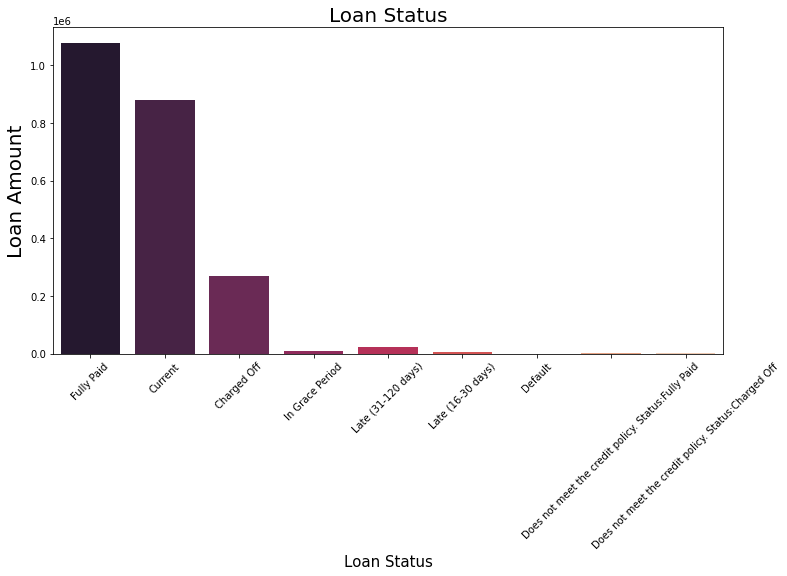

In [20]:
# Loan Status
plt.figure(figsize = (12,6))
g = sns.countplot(x="loan_status",data=a_lc,
                  palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [74]:
# check the current loans
current = a_lc.loc[a_lc.loan_status == 'Current']


In [75]:
# Excluding the current loans from dataset
a_lc = a_lc[a_lc.loan_status != 'Current']
a_lc.shape

(1382351, 35)

In [76]:
# Creating loan_category as an intermediate feature for vizualization purpose
a_lc["loan_category"] = np.where((a_lc.loan_status == 'Fully Paid') |
                        (a_lc.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 'Fully Paid', 'Charged Off')

In [77]:
# Excluding Grace period and late payment statuses as those are ambiguous to predict
a_lc = a_lc.loc[a_lc['loan_status'].isin(['Fully Paid','Charged Off', 
                                           'Does not meet the credit policy. Status:Fully Paid',
                                          'Does not meet the credit policy. Status:Charged Off',
                                          'Default'])]


In [78]:
# Sorting the data set by Issue Date
a_lc = a_lc.sort_values(by='issue_d')
a_lc

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,loan_category
1653655,304384,20000.0,36 months,11.97,664.00,C,C4,1 year,MORTGAGE,90012.0,Verified,Apr-2008,Does not meet the credit policy. Status:Fully ...,other,Small Business Expanding,660xx,KS,18.96,0.0,Mar-2001,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650776,317597,4500.0,36 months,11.97,149.40,C,C4,10+ years,MORTGAGE,115200.0,Not Verified,Apr-2008,Fully Paid,home_improvement,Home Project,207xx,MD,15.49,1.0,Feb-1994,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650777,320231,10000.0,36 months,10.08,323.05,B,B3,2 years,RENT,35665.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,"Help Me ""Stick It"" to the Big Banks",441xx,OH,21.57,0.0,Nov-1994,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650778,319964,5700.0,36 months,10.39,184.97,B,B4,1 year,RENT,36000.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,Bill payment,017xx,MA,9.57,0.0,Aug-2001,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
1650779,319299,4075.0,36 months,8.32,128.30,A,A4,< 1 year,RENT,19200.0,Not Verified,Apr-2008,Fully Paid,debt_consolidation,Help with credit cards,968xx,HI,1.25,0.0,Oct-2002,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,140621163,5000.0,36 months,14.47,172.04,C,C2,10+ years,RENT,48690.0,Source Verified,Sep-2018,Fully Paid,credit_card,Credit card refinancing,342xx,FL,23.15,0.0,Dec-2009,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,Fully Paid
764315,140599114,14000.0,60 months,10.47,300.71,B,B2,9 years,RENT,39000.0,Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,395xx,MS,18.52,0.0,Jan-2010,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,Fully Paid
764343,140557518,35000.0,36 months,12.73,1174.75,B,B5,10+ years,MORTGAGE,130000.0,Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,117xx,NY,10.36,1.0,Mar-1999,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,Fully Paid
764796,140579566,20000.0,36 months,6.67,614.53,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,Sep-2018,Fully Paid,debt_consolidation,Debt consolidation,208xx,MD,4.87,0.0,Jul-2002,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,Fully Paid


In [79]:
# Cleaning the data to keep the numeric values
a_lc['home_ownership'] = a_lc['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
a_lc['term'] = a_lc['term'].replace({'months':''}, regex = True)
a_lc['emp_length'] = a_lc['emp_length'].replace('< 1 year', '0 years')
a_lc['emp_length'] = a_lc['emp_length'].replace('10+ years', '10 years')
a_lc['emp_length'] = a_lc['emp_length'].replace({'year':'', 's':'', '\+':''}, regex = True)

# a_lc[['Profit', 'Sales']] = orders[['Profit', 'Sales']].apply(pd.to_numeric)


In [80]:
# Checking loan category counts
a_lc['loan_category'].value_counts()

Fully Paid     1078739
Charged Off     269360
Name: loan_category, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

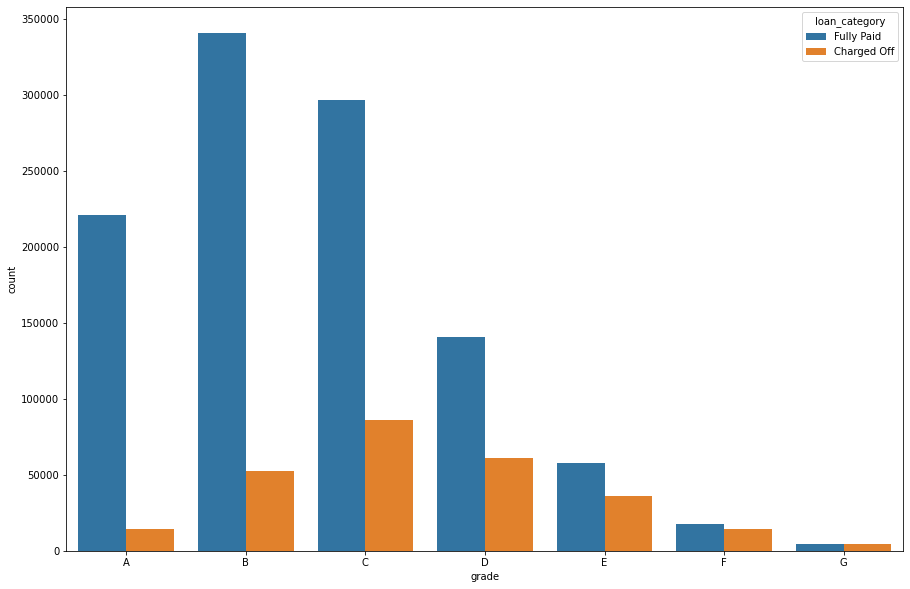

In [78]:
plt.figure(figsize=(15, 10))

# plt.subplot(2, 2, 1)
grade = sorted(a_lc.grade.unique().tolist())
sns.countplot(x='grade', data=a_lc, hue='loan_category', order=grade)



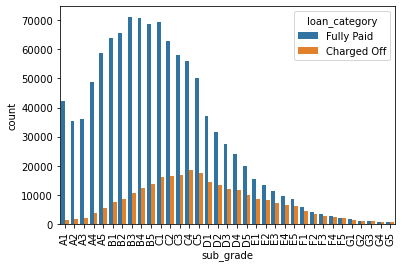

In [79]:

sub_grade = sorted(a_lc.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=a_lc, hue='loan_category', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Text(0, 0.5, 'loan amount')

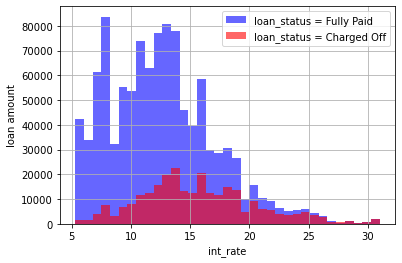

In [82]:
a_lc[a_lc["loan_category"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
a_lc[a_lc["loan_category"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")
plt.ylabel("loan amount")

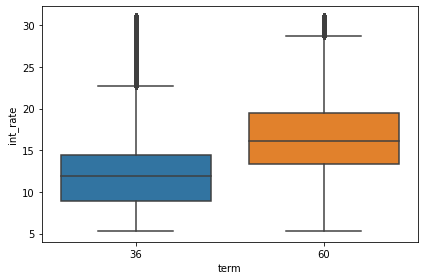

In [90]:
sns.boxplot(x='term', y='int_rate', data=a_lc)
# ax2.set_ylabel('')
# ax2.set_title(v + ' by Loan Status')
# ax2.set_xlabel(v)
    
plt.tight_layout()

In [26]:
numeric_var = ['loan_amnt', 'int_rate', 'installment', 'delinq_2yrs','annual_inc','dti', 
               'fico_range_low', 'fico_range_high', 'open_acc', 'total_acc', 'pub_rec', 'revol_bal', 'revol_util',
               'tot_coll_amt', 'tot_cur_bal', 'inq_last_6mths', 'inq_fi', 'avg_cur_bal', 'mort_acc',
               'pub_rec_bankruptcies', 'total_bal_ex_mort']

ordinal_var = ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']

nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

other = ['id', 'issue_d','loan_category', 'loan_status', 'earliest_cr_line']


In [25]:
def numeric_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(a_lc.loc[a_lc[v].notnull(), v], kde=False, ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    sns.boxplot(x='loan_category', y=v, data=a_lc, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(v + ' by Loan Status')
    ax2.set_xlabel(v)
    
    plt.tight_layout()
    
    

In [23]:
a_lc.groupby('term')['loan_category'].value_counts().loc[:,'Charged Off']

term
 36     163926
 60     105434
Name: loan_category, dtype: int64

In [41]:
a_lc.groupby('term')['dti'].mean()

term
 36     17.899460
 60     19.454113
Name: dti, dtype: float64

In [81]:
def categorical_plot(v):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(a_lc[v], palette = 'rocket', ax=ax1)
    ax1.set_title(f'Loan Status vs {v}')
    ax1.set_xlabel(v)
    ax1.set_ylabel('Count')
    
    
    good_rates = a_lc.groupby(v)['loan_category'].value_counts(normalize=True).loc[:,'Fully Paid']
    sns.barplot(x=good_rates.index, y=good_rates.values, palette = 'rocket', ax=ax2)
    ax2.set_ylabel('Fraction of Good Loans')
    ax2.set_title('Fully Paid Rate by ' + v)
    ax2.set_xlabel(v)
    ax2.set_ylim(0,1)
    
    
    plt.tight_layout()
#     order=sorted(a_lc[v].unique())

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

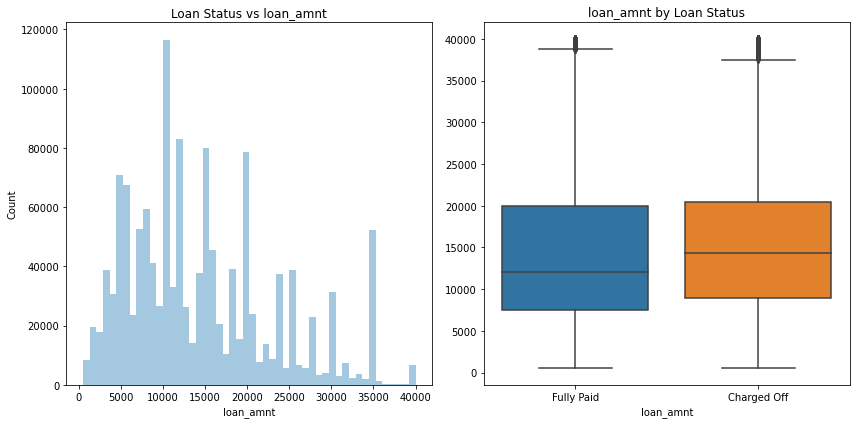

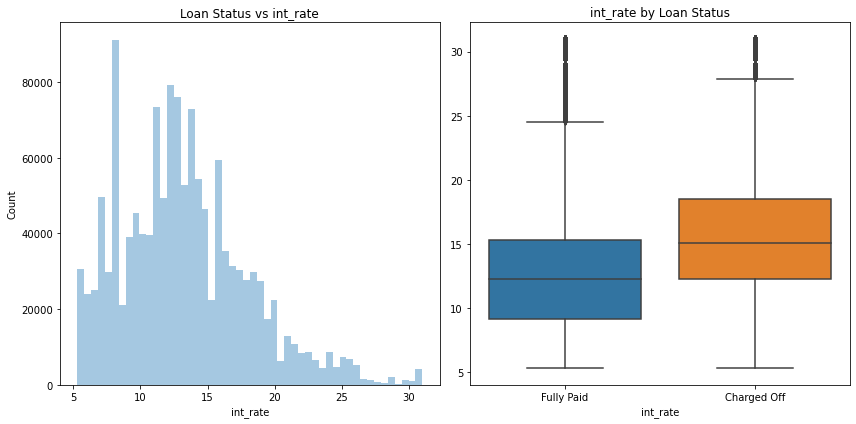

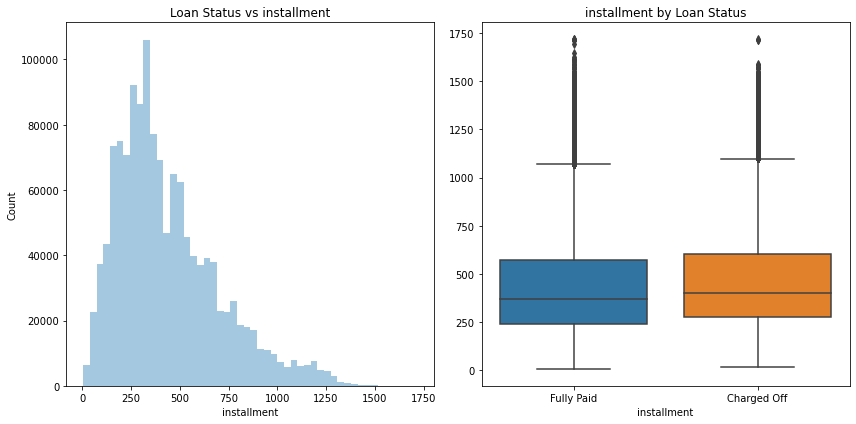

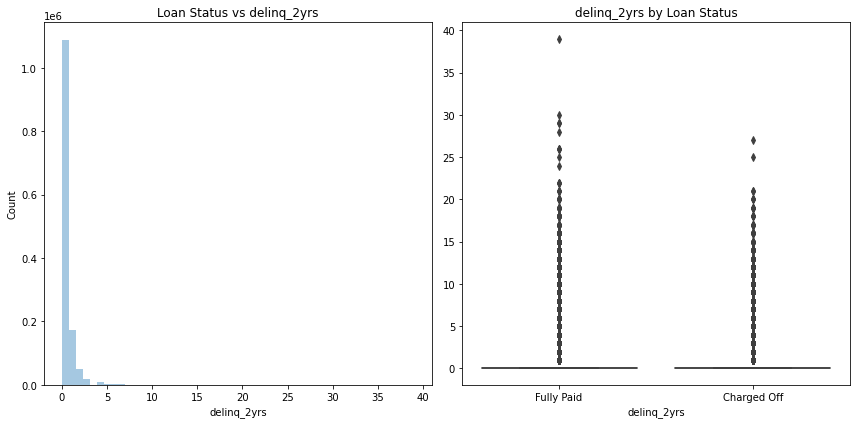

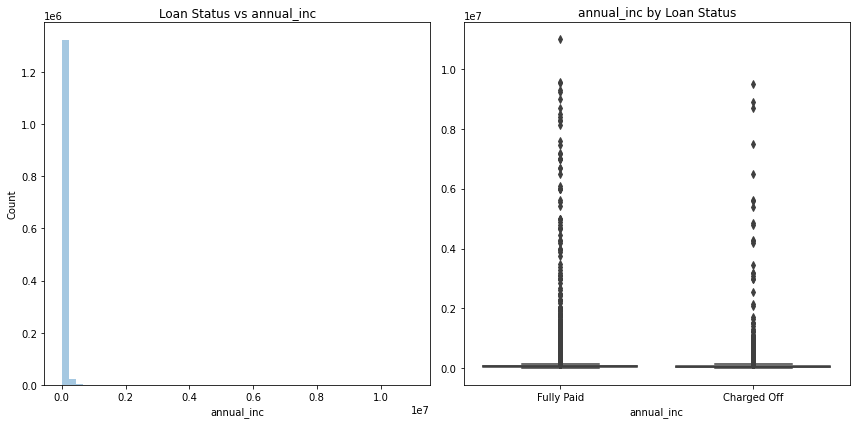

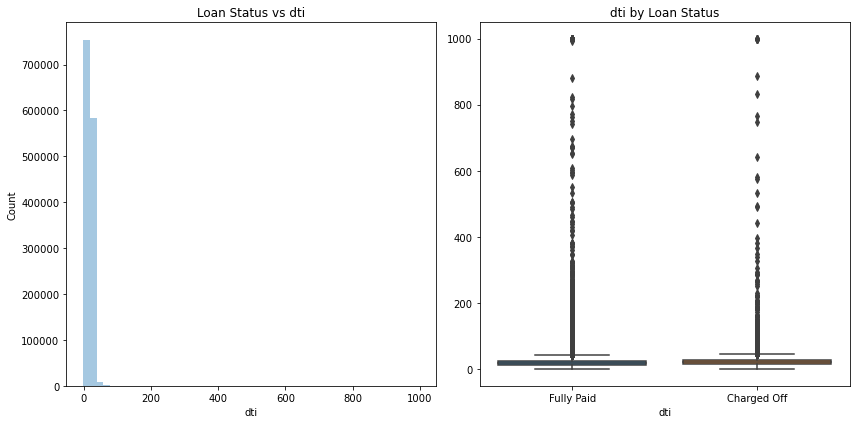

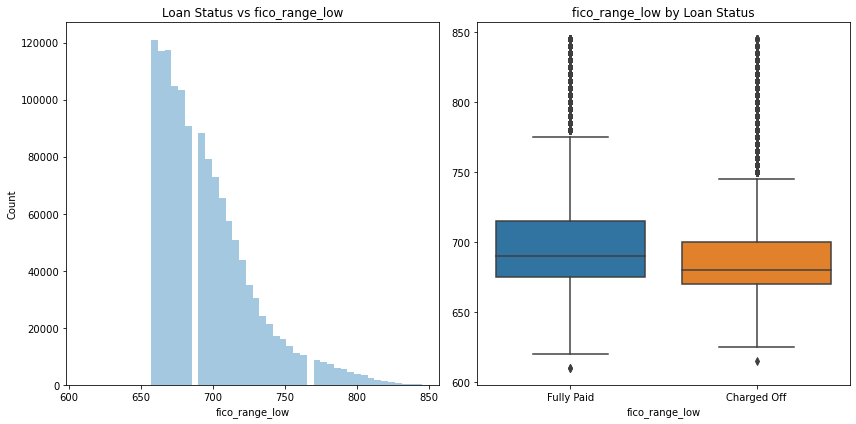

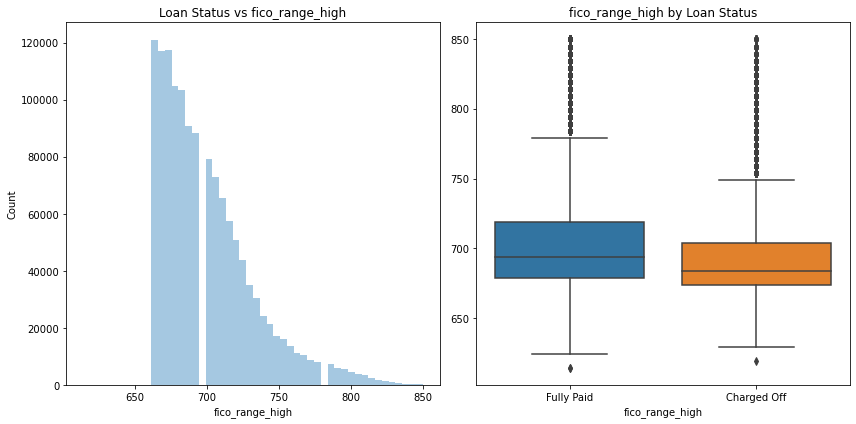

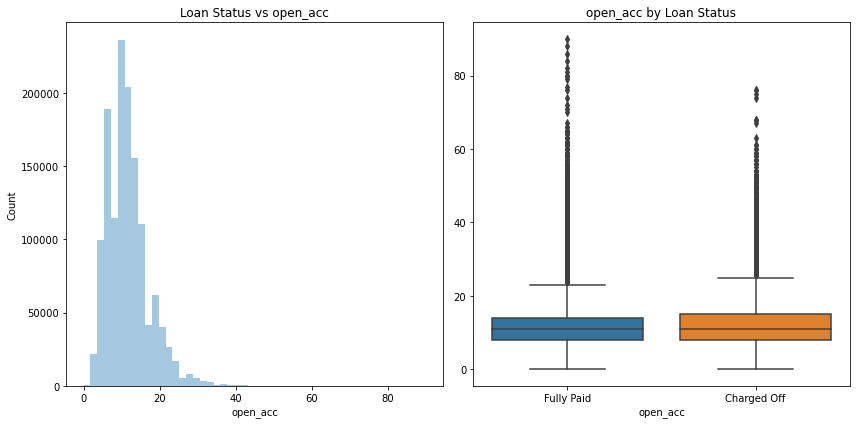

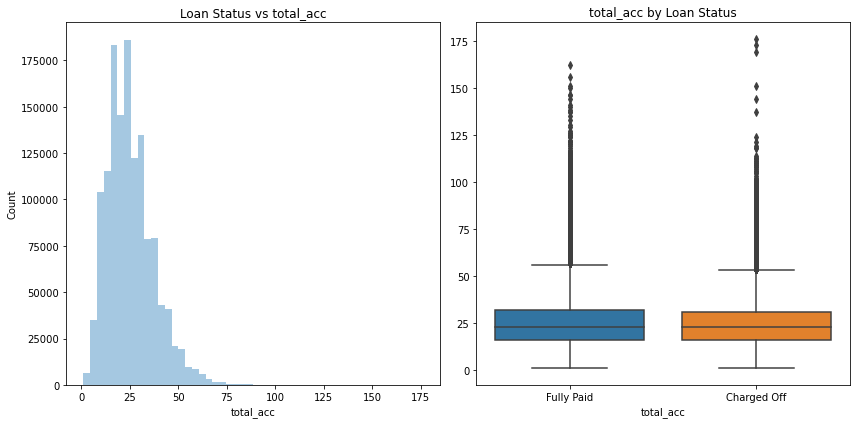

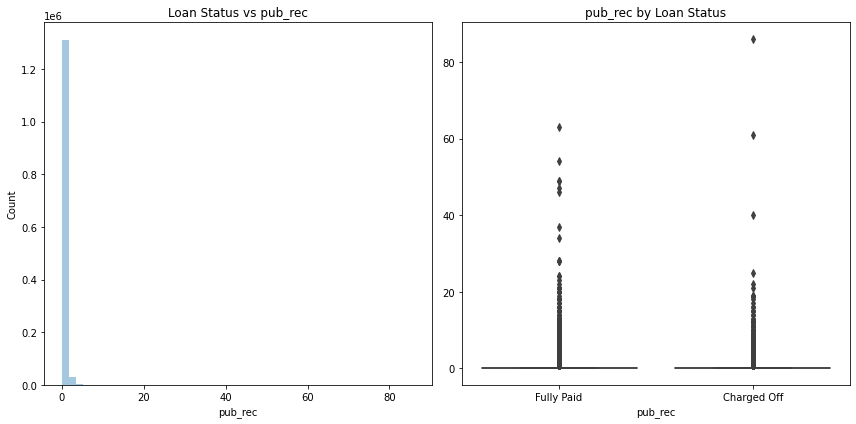

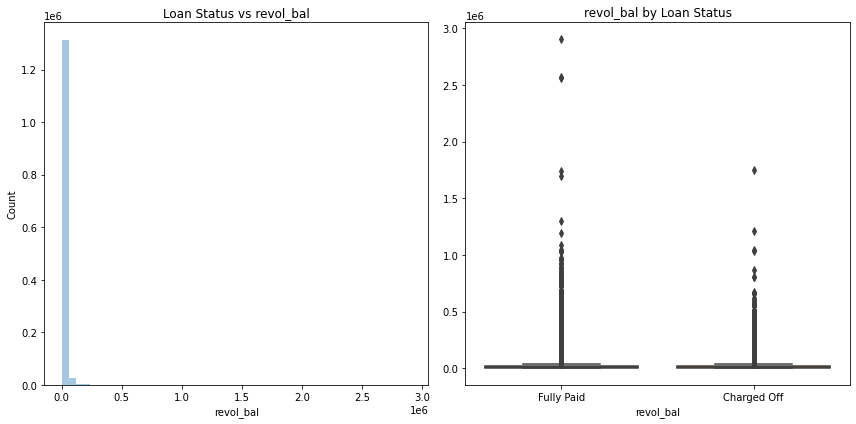

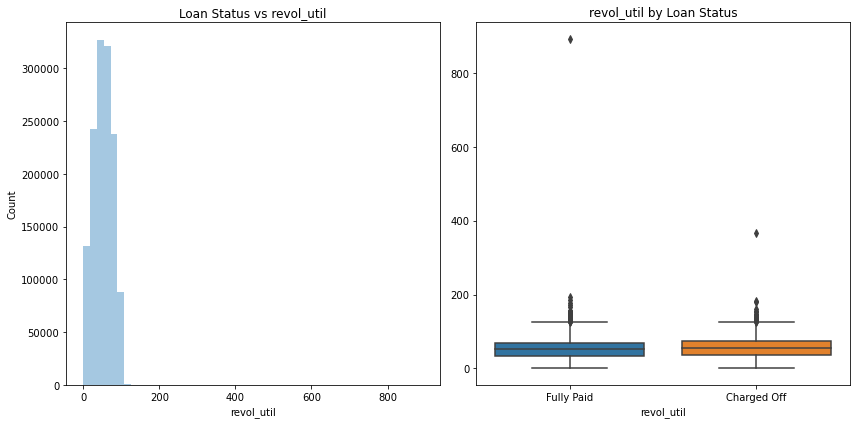

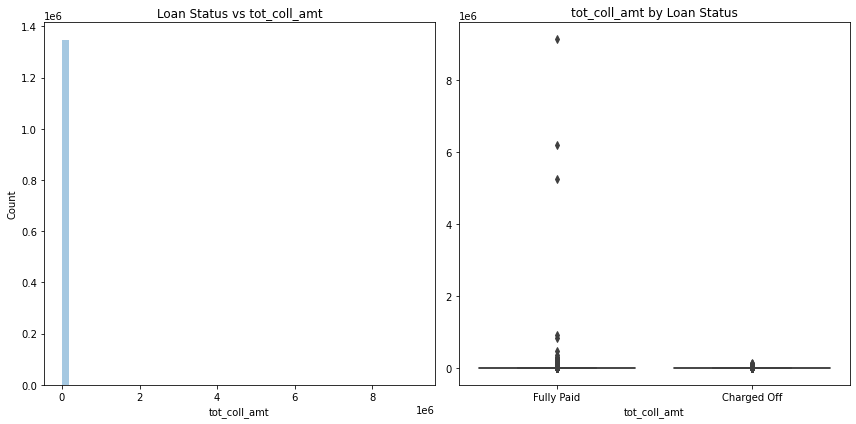

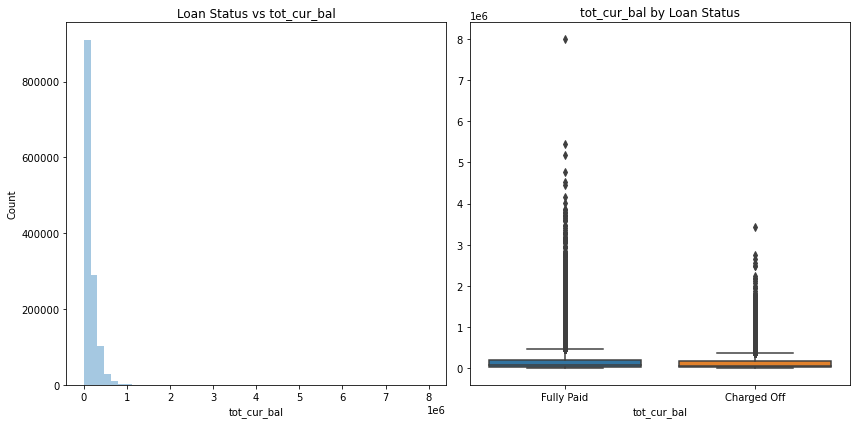

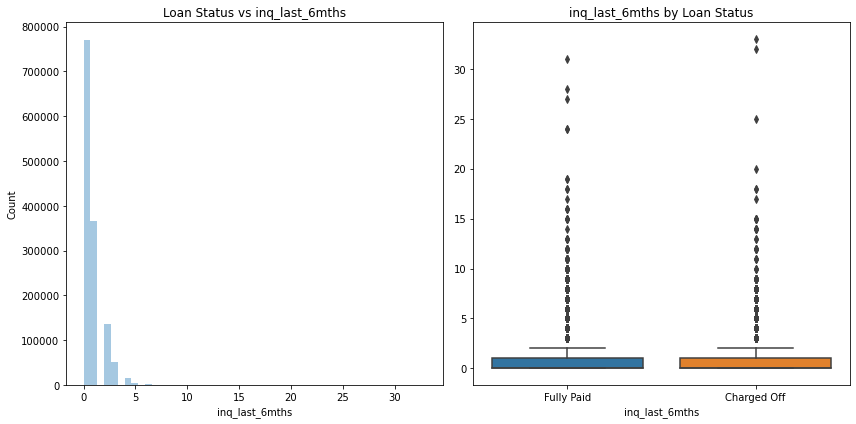

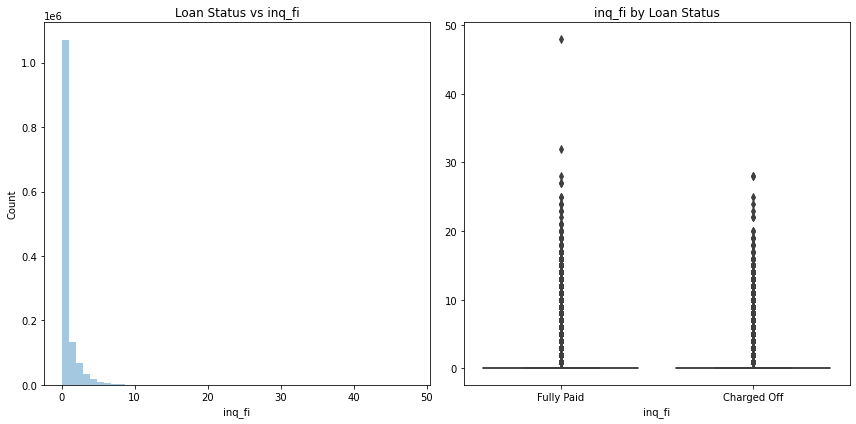

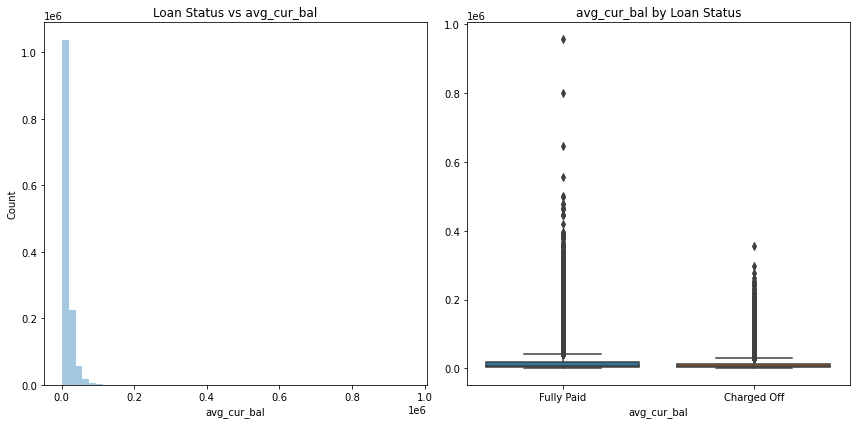

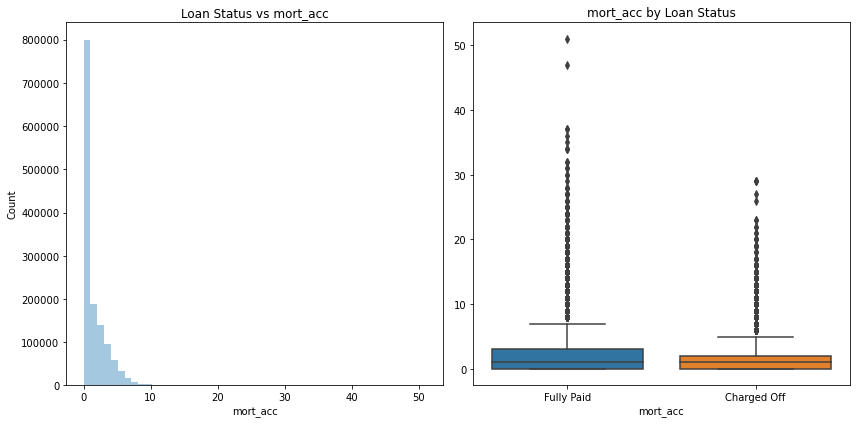

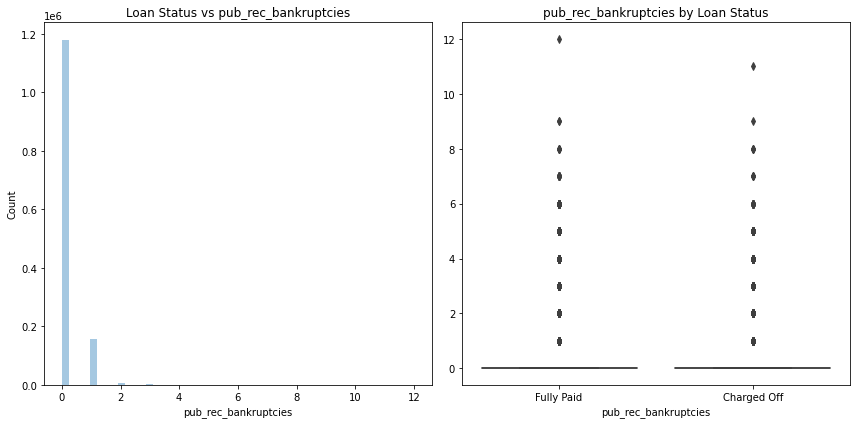

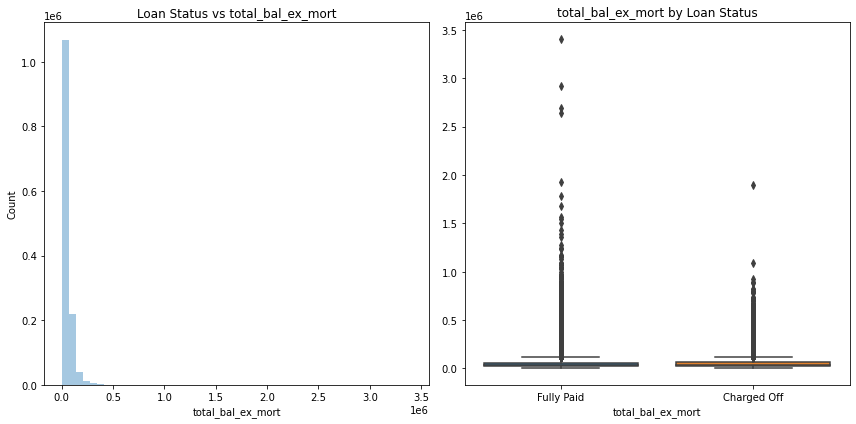

In [28]:
for v in numeric_var:
    numeric_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\si

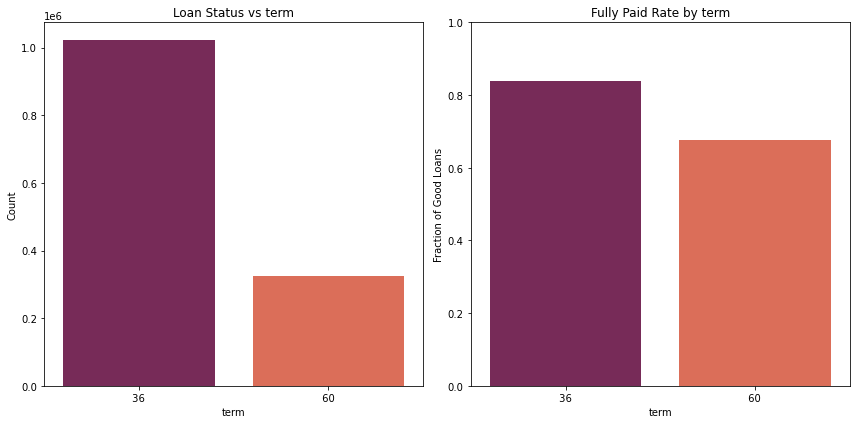

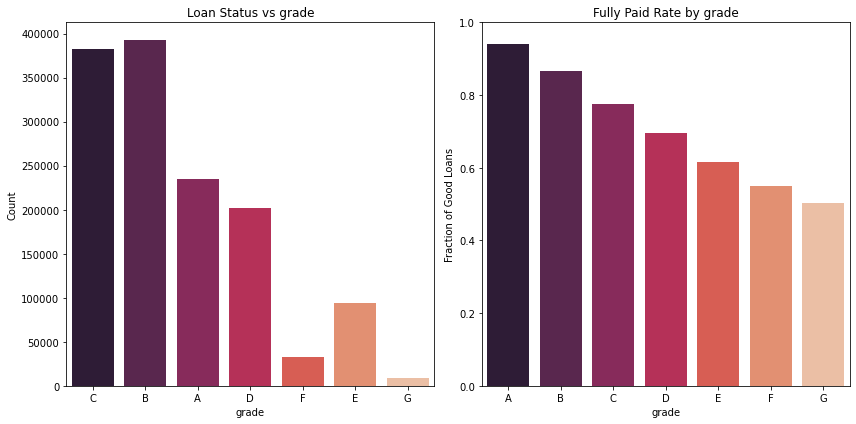

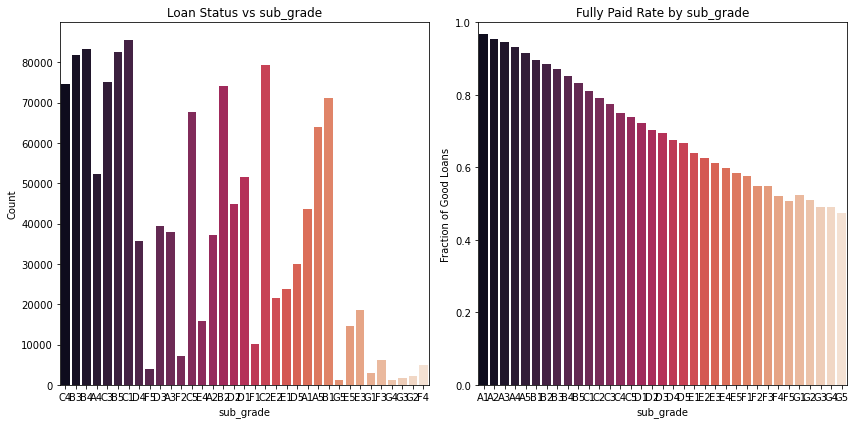

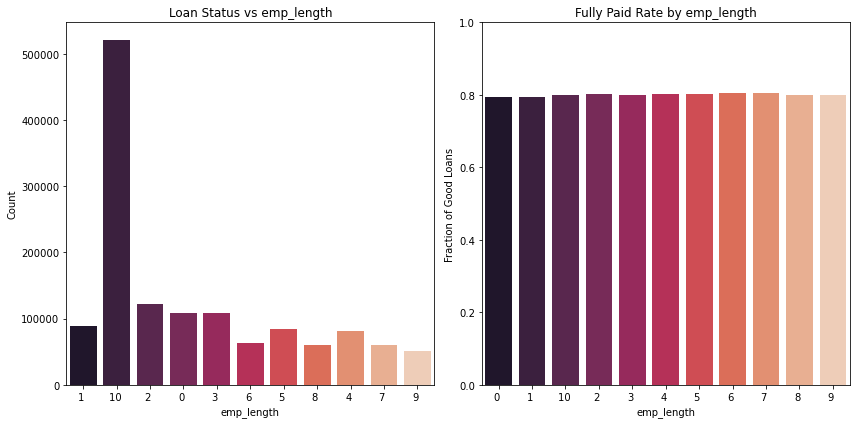

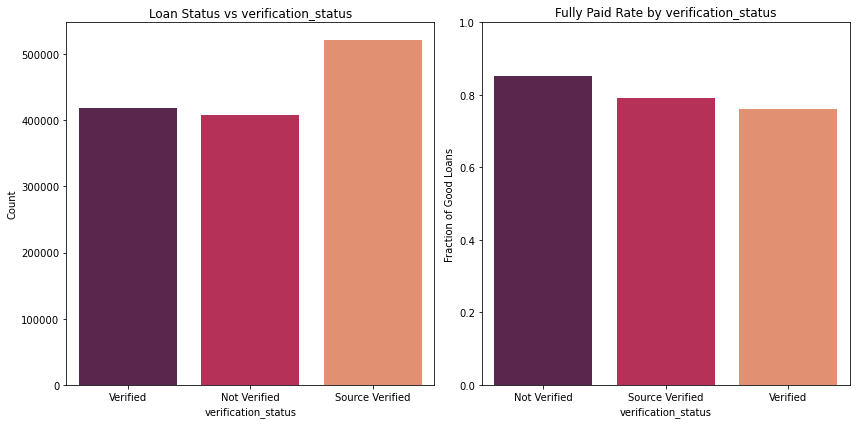

In [38]:
for v in ordinal_var:
    categorical_plot(v)

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


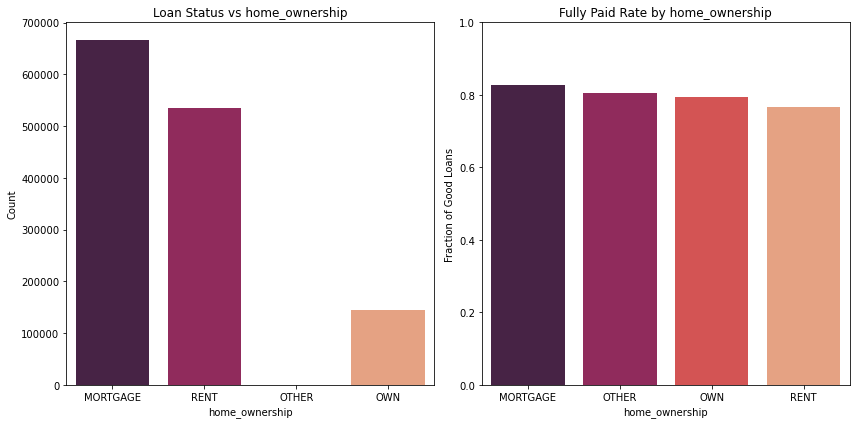

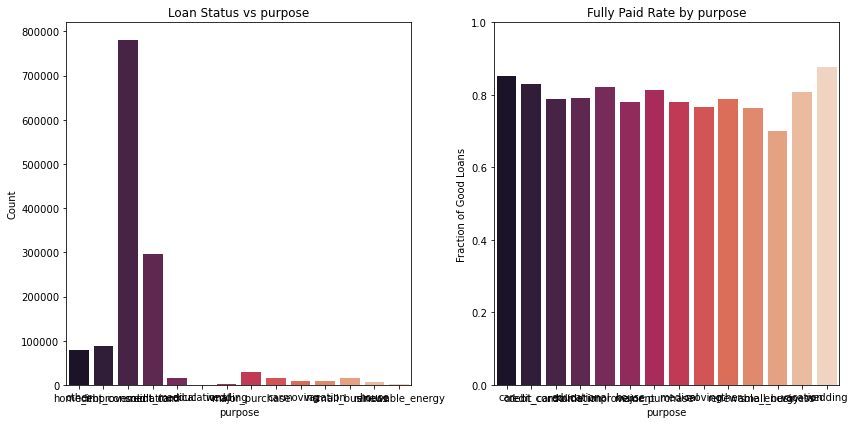

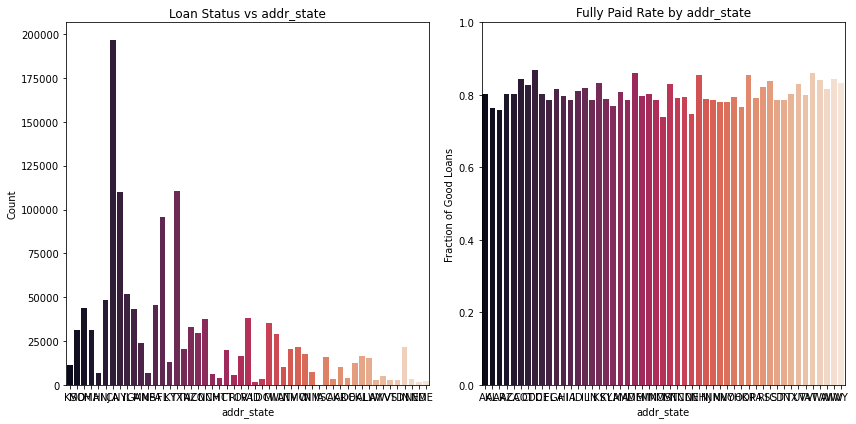

In [82]:
# nominal_var = ['home_ownership','purpose', 'title', 'zip_code', 'addr_state']

categorical_plot('home_ownership')
categorical_plot('purpose')
# categorical_plot('title')
categorical_plot('addr_state')

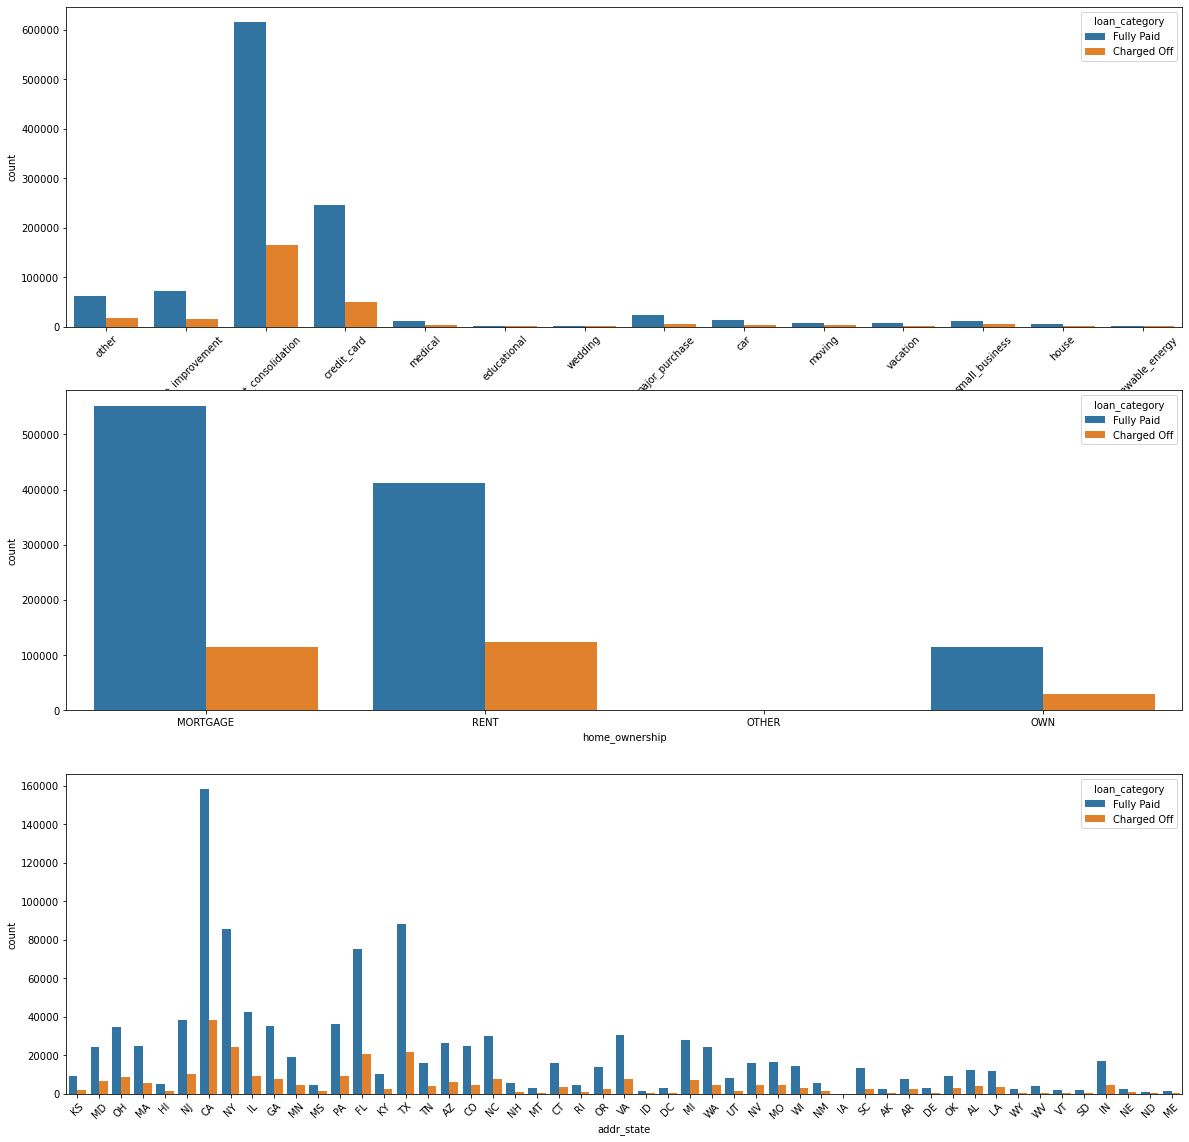

In [83]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
purpose = sns.countplot(x='purpose', data=a_lc, hue='loan_category')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=45);

plt.subplot(3, 1, 2)
sns.countplot(x='home_ownership', data=a_lc, hue='loan_category')

plt.subplot(3, 1, 3)
state = sns.countplot(x='addr_state', data=a_lc, hue='loan_category')
state.set_xticklabels(state.get_xticklabels(), rotation=45);

# sns.countplot(x='title', data=a_lc, hue='loan_category')




### Data Cleaning

In [41]:
a_lc.issue_d

1653655    Apr-2008
1650776    Apr-2008
1650777    Apr-2008
1650778    Apr-2008
1650779    Apr-2008
             ...   
764308     Sep-2018
764315     Sep-2018
764343     Sep-2018
764796     Sep-2018
782520     Sep-2018
Name: issue_d, Length: 1348099, dtype: object

In [81]:
import datetime as dt
def make_dateval(s):
    return dt.datetime.strptime(s[-4:]+s[:3]+'01', '%Y%b%d')
a_lc.issue_d = a_lc.issue_d.apply(make_dateval)
a_lc.earliest_cr_line = a_lc.earliest_cr_line.apply(make_dateval)
a_lc['year'] = a_lc.issue_d.apply(lambda x: x.year)
a_lc['cred_year'] = a_lc.earliest_cr_line.apply(lambda x: x.year)
a_lc['cred_length'] = a_lc['year'] - a_lc['cred_year']


In [85]:
yearly_count = a_lc.groupby('year')['loan_category'].count().reset_index()
yearly_count = yearly_count.rename(columns={'loan_category': 'counts'})
yearly_count['ratio'] = yearly_count['counts'] / len(a_lc)
yearly_count

,year,counts,ratio
0,2007,603,0.000447
1,2008,2393,0.001775
2,2009,5281,0.003917
3,2010,12537,0.009300
4,2011,21721,0.016112
5,2012,53367,0.039587
6,2013,134804,0.099996
7,2014,223103,0.165495
8,2015,375546,0.278574
9,2016,293105,0.217421


Text(0, 0.5, 'Ratio')

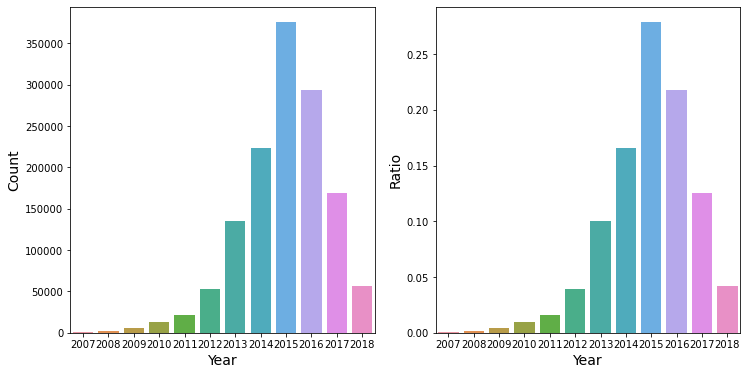

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='year', data=a_lc, ax=ax1)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)


sns.barplot(x='year', y = 'ratio', data=yearly_count, ax=ax2)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Ratio', fontsize=14)

# plt.show()

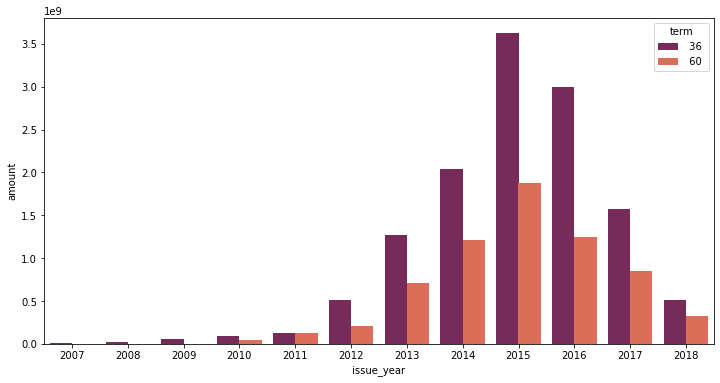

In [28]:
# Plot for Issue year vs Loan Amount
# making issue date as date time

a_lc['issue_d'] = pd.to_datetime(a_lc['issue_d'])
a_lc = a_lc[pd.notnull(a_lc['issue_d'])]
a_lc['issue_year'] = a_lc['issue_d'].dt.year
yamnt = pd.DataFrame({'amount' : a_lc.groupby(['issue_year', 'term']).sum()['loan_amnt']}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="issue_year", y="amount",
             hue="term", palette="rocket", linewidth=2.5,
             data=yamnt)

Text(0.5, 1.0, 'Interest Rate Distribuition')

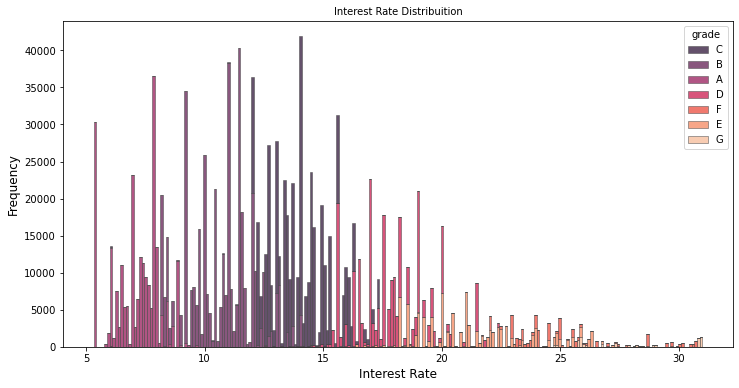

In [202]:
# Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
g = sns.histplot(a_lc, x="int_rate",hue='grade',
    multiple="stack",
    palette="rocket",
    edgecolor=".3",linewidth=.5
    )
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Interest Rate Distribuition", fontsize=10)

In [29]:
# Creating target feature loan_class to check Good and Bad Loan. Good is 0 and bad is 1
a_lc["loan_class"] = np.where((a_lc.loan_category == 'Fully Paid'), 0, 1)

In [30]:
a_lc.loan_class.value_counts()

0    1078739
1     269360
Name: loan_class, dtype: int64

In [29]:
a_lc.loan_status.value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [114]:
# Total Loan Amount Cost
cost = a_lc.groupby('loan_class').loan_amnt.sum().sort_values(ascending=False)

# Showing the amounts in $bn 
print("Fully paid loans: $"+str(round(cost[0]/1e9,1))+"bn")
print("Charged off loans: $"+str(round(cost[1]/1e9,1))+"bn")

# What is this as a percentage of the charge off rate, i.e. the cost of risk (CoR)? 
default_cost = cost[1]/a_lc['loan_amnt'].sum()
print("cost of default is "+str(round(default_cost*100,1))+"%")

Fully paid loans: $15.2bn
Charged off loans: $4.2bn
cost of default is 21.6%


In [83]:
a_lc['grade'].value_counts()

B    393102
C    382323
A    235193
D    201657
E     94192
F     32306
G      9326
Name: grade, dtype: int64

In [115]:
# Remove these columns based on data analysis
a_lc.drop(['grade','issue_d', 'loan_status', 'zip_code', 'earliest_cr_line', 'cred_year', 'title'], axis=1, inplace=True)

In [116]:
state_count = a_lc.groupby(['addr_state']).count().reset_index()
state_count = state_count[['addr_state','loan_class']]
state_count.rename(columns={'loan_class': 'counts'})

unique_count = a_lc.groupby(['addr_state','loan_class']).count().reset_index()
unique_count = unique_count[['addr_state','loan_class', 'id']]
m = pd.merge(unique_count, state_count, on="addr_state", how = "left")
m.rename(columns={'loan_class_y': 'total'})

m

,addr_state,loan_class_x,id,loan_class_y
0,AK,0,2567,3195
1,AK,1,628,3195
2,AL,0,12711,16645
3,AL,1,3934,16645
4,AR,0,7636,10062
5,AR,1,2426,10062
6,AZ,0,26310,32748
7,AZ,1,6438,32748
8,CA,0,158211,196853
9,CA,1,38642,196853


In [ ]:
m['ratio'] = m['id']/m['loan_class_y']
m = m[['addr_state', 'loan_class_x', 'ratio']]
m.set_index('addr_state')

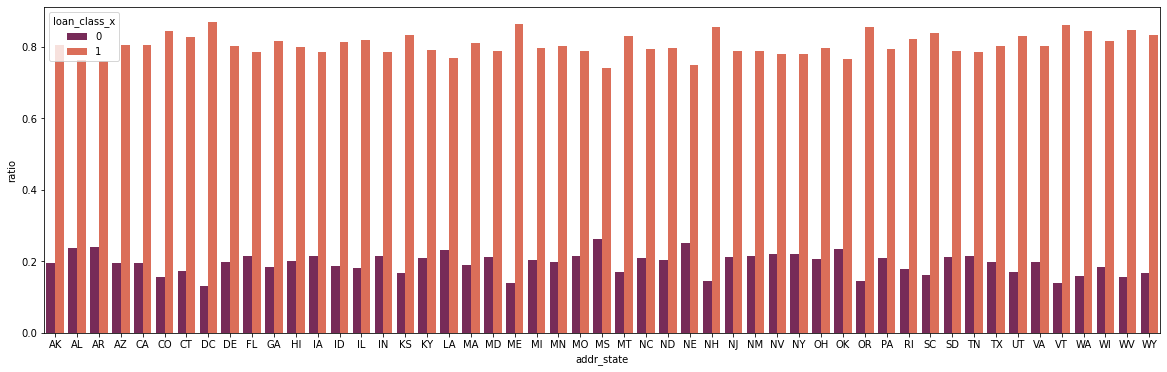

In [128]:
plt.figure(figsize=(20,6))
sns.barplot(x="addr_state", y="ratio",
             hue="loan_class_x", palette="rocket", linewidth=2.5,
             data=m) #drop state

In [3]:
with open('cleaned_data.pkl', 'rb') as pickle_file:
    a_lc = pickle.load(pickle_file)

In [4]:
a_lc.head(5)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,loan_class,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_amnt,int_amnt
1653655,20000.0,36,11.97,664.00,14,1,90012.0,2,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,720000.0,239400.0
1650776,4500.0,36,11.97,149.40,14,10,115200.0,0,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,162000.0,53865.0
1650777,10000.0,36,10.08,323.05,8,2,35665.0,0,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,360000.0,100800.0
1650778,5700.0,36,10.39,184.97,9,1,36000.0,0,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,205200.0,59223.0
1650779,4075.0,36,8.32,128.30,4,0,19200.0,0,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,146700.0,33904.0


In [6]:
a_lc.loan_class.value_counts()

0    1078739
1     269360
Name: loan_class, dtype: int64

<AxesSubplot:>

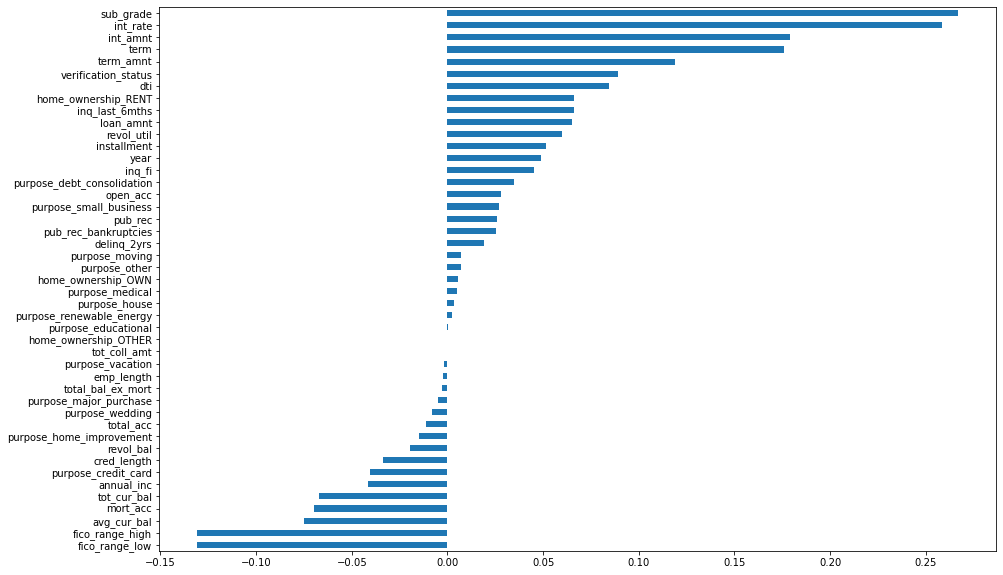

In [89]:
plt.figure(figsize=(15,10))
a_lc.corr()['loan_class'].drop('loan_class').sort_values().plot(kind='barh')

In [31]:
a_lc.head(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,loan_category,year,cred_year,cred_length,loan_class
1653655,304384,20000.0,36,11.97,664.00,C,C4,1,MORTGAGE,90012.0,Verified,2008-04-01,Does not meet the credit policy. Status:Fully ...,other,Small Business Expanding,660xx,KS,18.96,0.0,2001-03-01,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2001,7,0
1650776,317597,4500.0,36,11.97,149.40,C,C4,10,MORTGAGE,115200.0,Not Verified,2008-04-01,Fully Paid,home_improvement,Home Project,207xx,MD,15.49,1.0,1994-02-01,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,1994,14,0
1650777,320231,10000.0,36,10.08,323.05,B,B3,2,RENT,35665.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,"Help Me ""Stick It"" to the Big Banks",441xx,OH,21.57,0.0,1994-11-01,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,1994,14,0
1650778,319964,5700.0,36,10.39,184.97,B,B4,1,RENT,36000.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,Bill payment,017xx,MA,9.57,0.0,2001-08-01,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2001,7,0
1650779,319299,4075.0,36,8.32,128.30,A,A4,0,RENT,19200.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,Help with credit cards,968xx,HI,1.25,0.0,2002-10-01,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2002,6,0


Text(0.5, 1.0, 'Interest Rate Distribuition')

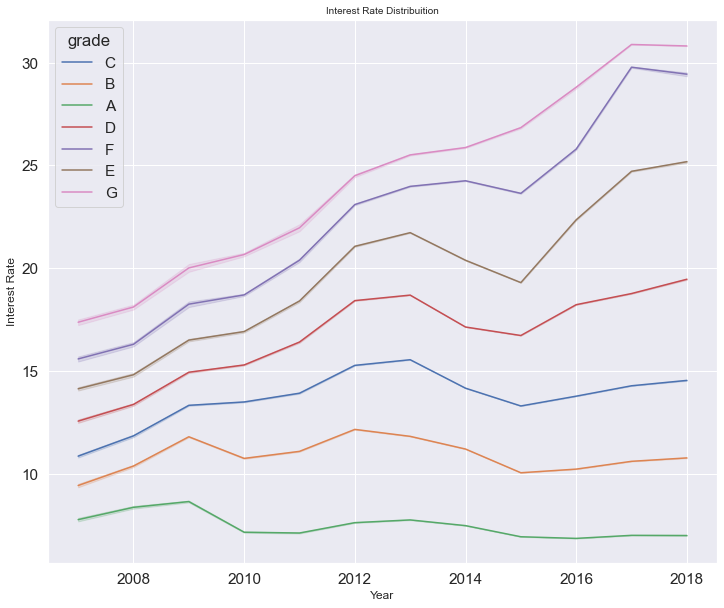

In [37]:
plt.figure(figsize=(12,10))
g = sns.lineplot(x = "year", y = "int_rate", data=a_lc, hue = 'grade')
g.set_xlabel("Year", fontsize=12)
g.set_ylabel("Interest Rate", fontsize=12)
g.set_title("Interest Rate Distribuition", fontsize=10)

### Encoding

In [117]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['id', 'term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'loan_category']


In [118]:
a_lc.drop(['id','addr_state'], axis =1, inplace=True)

In [119]:
sub_grades = sorted(a_lc.sub_grade.unique())
grades = dict((i,j) for i,j in enumerate(sub_grades, start=1))
grades = {grades[k]:k for k in grades}

# sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades} 
# sub_grades_dict

In [120]:
a_lc_wo = a_lc.copy()

In [121]:
a_lc['sub_grade'] = a_lc['sub_grade'].map(grades)

In [122]:
verification_status = {'Not Verified':0, 'Source Verified':1, 'Verified':2}
a_lc['verification_status'] = a_lc['verification_status'].map(verification_status)


In [123]:
# Dummy variable created for the following features
categorical = ['home_ownership', 'purpose']
a_lc =pd.get_dummies(a_lc, columns=categorical, drop_first=True)


In [124]:
print([column for column in a_lc.columns if a_lc[column].dtype == 'object'])

['term', 'emp_length', 'loan_category']


In [44]:
a_lc[['term', 'emp_length']] = a_lc[['term', 'emp_length']].apply(pd.to_numeric)

In [126]:
a_lc.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt',
       'tot_cur_bal', 'inq_fi', 'avg_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'total_bal_ex_mort', 'loan_category', 'year',
       'cred_length', 'loan_class', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

## Feature Engineering

In [127]:
a_lc['term_amnt'] = a_lc['loan_amnt']*a_lc['term'] #in order to calculate weighted average. longer term => takes longer to pay
weighted_average = a_lc['term_amnt'].sum()/a_lc['loan_amnt'].sum()

print(f'Average term: {round(a_lc.term.mean(),2)} months')
print(f'Weighted average term amount: {str(round(weighted_average,2))} months')

Average term: 41.78 months
Weighted average term amount: 44.15 months


In [45]:
a_lc['loan_amnt']*a_lc['term']

1653655     720000.0
1650776     162000.0
1650777     360000.0
1650778     205200.0
1650779     146700.0
             ...    
764308      180000.0
764315      840000.0
764343     1260000.0
764796      720000.0
782520      252000.0
Length: 1348099, dtype: float64

In [128]:
a_lc['int_amnt'] = a_lc['int_rate']*a_lc['loan_amnt']
cumulative_avg_int_rate = a_lc['int_amnt'].sum()/a_lc['loan_amnt'].sum()

print(f'Average interest rate: {str(round(a_lc.int_rate.mean(),2))}%')
print(f'Weighted av. rate: {str(round(cumulative_avg_int_rate,2))}%')

Average interest rate: 13.24%
Weighted av. rate: 13.65%


In [129]:
a_lc.drop('loan_category', axis=1,inplace=True)


In [ ]:
a_lc

C:\Users\Chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

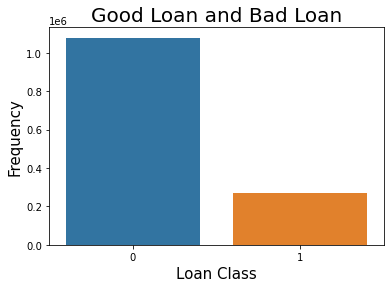

In [48]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(a_lc["loan_class"])
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Class", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

## Train_test_ split

In [155]:
loans = a_lc.copy()

In [3]:
import pickle
with open('cleaned_data.pkl', 'rb') as pickle_file:
    loans = pickle.load(pickle_file)


In [4]:
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,year,cred_length,loan_class,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_amnt,int_amnt
1653655,20000.0,36,11.97,664.00,14,1,90012.0,2,18.96,0.0,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,720000.0,239400.0
1650776,4500.0,36,11.97,149.40,14,10,115200.0,0,15.49,1.0,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,162000.0,53865.0
1650777,10000.0,36,10.08,323.05,8,2,35665.0,0,21.57,0.0,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,14,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,360000.0,100800.0
1650778,5700.0,36,10.39,184.97,9,1,36000.0,0,9.57,0.0,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,205200.0,59223.0
1650779,4075.0,36,8.32,128.30,4,0,19200.0,0,1.25,0.0,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,2008,6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,146700.0,33904.0


In [61]:
loans['sub_grade'].value_counts

<bound method IndexOpsMixin.value_counts of 1653655    14
1650776    14
1650777     8
1650778     9
1650779     4
           ..
764308     12
764315      7
764343     10
764796      2
782520     15
Name: sub_grade, Length: 1348099, dtype: int64>

In [5]:
#split loans into train test groups based on year. Define X_train/test, Y_train/test

loans_train = loans[loans['year'] < 2018]
loans_test = loans[loans['year'] == 2018]

X_train = loans_train.loc[:, loans_train.columns != "loan_class"]
Y_train = loans_train["loan_class"]

X_test = loans_test.loc[:, loans_test.columns != "loan_class"]
Y_test = loans_test["loan_class"]

X_train.drop('year', axis =1)
X_test.drop('year', axis =1)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,cred_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_amnt,int_amnt
1589531,13000.0,36,11.98,431.67,10,7,46000.0,1,19.44,0.0,660.0,664.0,0.0,10.0,1.0,11557.0,48.0,21.0,0.0,213466.0,0.0,21347.0,2.0,1.0,137886.0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,468000.0,155740.00
1589574,30000.0,60,23.87,860.78,22,10,82000.0,1,3.19,0.0,670.0,674.0,1.0,8.0,0.0,22476.0,73.7,23.0,0.0,64517.0,3.0,8065.0,0.0,0.0,64517.0,14,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1800000.0,716100.00
1589567,5775.0,36,12.61,193.50,11,3,32500.0,0,17.98,0.0,725.0,729.0,1.0,5.0,0.0,4403.0,36.7,5.0,0.0,89879.0,1.0,17976.0,1.0,0.0,15414.0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,207900.0,72822.75
1589489,5000.0,36,14.07,171.06,13,5,30000.0,1,17.16,0.0,705.0,709.0,0.0,7.0,0.0,10301.0,50.5,7.0,0.0,11795.0,1.0,1685.0,0.0,0.0,11795.0,14,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,180000.0,70350.00
1589498,40000.0,36,10.90,1307.66,9,5,105000.0,2,10.94,0.0,710.0,714.0,1.0,22.0,0.0,4903.0,28.5,47.0,0.0,97043.0,4.0,4411.0,0.0,0.0,97043.0,15,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1440000.0,436000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764308,5000.0,36,14.47,172.04,12,10,48690.0,1,23.15,0.0,715.0,719.0,1.0,6.0,0.0,3874.0,55.3,19.0,0.0,21522.0,4.0,3587.0,0.0,0.0,21522.0,9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,180000.0,72350.00
764315,14000.0,60,10.47,300.71,7,9,39000.0,2,18.52,0.0,760.0,764.0,0.0,4.0,0.0,1251.0,22.7,11.0,0.0,13496.0,0.0,3374.0,0.0,0.0,13496.0,8,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,840000.0,146580.00
764343,35000.0,36,12.73,1174.75,10,10,130000.0,2,10.36,1.0,690.0,694.0,0.0,4.0,0.0,11258.0,86.6,21.0,0.0,344348.0,0.0,86087.0,4.0,0.0,17934.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1260000.0,445550.00
764796,20000.0,36,6.67,614.53,2,10,300000.0,0,4.87,0.0,750.0,754.0,1.0,10.0,0.0,35515.0,39.9,33.0,0.0,387816.0,1.0,38782.0,2.0,0.0,54917.0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,720000.0,133400.00


In [6]:
X_train.shape, X_test.shape

((1291781, 45), (56318, 45))

In [6]:
# with open('loans_test.pkl', 'wb') as pickle_file:
#     pickle.dump(loans_test, pickle_file)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,inq_fi,avg_cur_bal,mort_acc,pub_rec_bankruptcies,total_bal_ex_mort,loan_category,year,cred_year,cred_length,loan_class
1653655,304384,20000.0,36,11.97,664.00,C,C4,1,MORTGAGE,90012.0,Verified,2008-04-01,Does not meet the credit policy. Status:Fully ...,other,Small Business Expanding,660xx,KS,18.96,0.0,2001-03-01,705.0,709.0,7.0,17.0,0.0,17212.0,39.7,31.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2001,7,0
1650776,317597,4500.0,36,11.97,149.40,C,C4,10,MORTGAGE,115200.0,Not Verified,2008-04-01,Fully Paid,home_improvement,Home Project,207xx,MD,15.49,1.0,1994-02-01,670.0,674.0,1.0,10.0,0.0,22625.0,86.4,30.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,1994,14,0
1650777,320231,10000.0,36,10.08,323.05,B,B3,2,RENT,35665.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,"Help Me ""Stick It"" to the Big Banks",441xx,OH,21.57,0.0,1994-11-01,745.0,749.0,0.0,17.0,0.0,16973.0,26.4,20.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,1994,14,0
1650778,319964,5700.0,36,10.39,184.97,B,B4,1,RENT,36000.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,Bill payment,017xx,MA,9.57,0.0,2001-08-01,695.0,699.0,0.0,8.0,0.0,6342.0,74.4,15.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2001,7,0
1650779,319299,4075.0,36,8.32,128.30,A,A4,0,RENT,19200.0,Not Verified,2008-04-01,Fully Paid,debt_consolidation,Help with credit cards,968xx,HI,1.25,0.0,2002-10-01,740.0,744.0,0.0,4.0,0.0,296.0,2.0,5.0,0.0,79240.0,0.0,7335.0,0.0,0.0,37864.0,Fully Paid,2008,2002,6,0


## Performance Metric Calculation

In [22]:
# Assuming cost of funding is 3%
CoF =3

In [7]:
a_lc['term_amnt'].sum() / a_lc['loan_amnt'].sum()

NameError: name 'a_lc' is not defined

In [8]:
#gives back necessary financial metrics of loan data for comparison
def return_stats(df, title):
    """
    Function to return all of the financial returns data for comparing the models
    returns: the total book return on equity in %
    """
        
    weighted_term = df['term_amnt'].sum() / df['loan_amnt'].sum()
    weighted_interest = df['int_amnt'].sum() / df['loan_amnt'].sum()
    charge_off_rate = df['loan_class'].value_counts(normalize=True)
    charge_off_amount = df.groupby('loan_class').loan_amnt.sum() #dollar amount of each loan_class
    total_CoR = charge_off_amount[1] / df['loan_amnt'].sum() #dollar amount of default loans

    loans_approved = df.loan_amnt.sum() #total dollar amount of loans 
    loans_charged_off = charge_off_amount[1] #total dollar amount of default loans

    # And therefore, the ROI:
    loans_returned = loans_approved - loans_charged_off #total loan amount paid back
    interest_earned = loans_returned * (weighted_interest) / 100 * (weighted_term / 12) #interest amount per year 
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12) #CoF (cost of funds)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved

    
    print(title)
    print(f'Weighted average term amount: {str(round(weighted_term,2))} months')
    print(f'Weighted av. rate: {str(round(weighted_interest,2))}%')
    print(f'Total cost of risk due to default: {str(round(total_CoR * 100, 2))}%')
    print(f'Total loan book is: $ {str(round(loans_approved / 1e6))} M')
    print(f'Interest earned is: $ {str(round(interest_earned / 1e6, 0))} M')
    print(f'Interest paid is: $ {str(round(interest_paid / 1e6, 0))} M')
    print(f'Profit is: $ {str(round(profit / 1e6, 0))} M')
    print(f'Total book ROI: {str(round(ROI * 100, 2))} %')

    return weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI

In [24]:
# High level Performance metrics of all Loans
weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI = return_stats(loans, 'Total book')

Total book
Weighted average term amount: 44.15 months
Weighted av. rate: 13.65%
Total cost of risk due to default: 21.56%
Total loan book is: $ 19425 M
Interest earned is: $ 7651.0 M
Interest paid is: $ 2144.0 M
Profit is: $ 1319.0 M
Total book ROI: 6.79 %


In [25]:
# High level Performance metrics of train data
weighted_term, weighted_interest, charge_off_rate, charge_off_amount, total_CoR, ROI = return_stats(loans_train, 'Total book')

Total book
Weighted average term amount: 44.09 months
Weighted av. rate: 13.65%
Total cost of risk due to default: 21.72%
Total loan book is: $ 18587 M
Interest earned is: $ 7295.0 M
Interest paid is: $ 2049.0 M
Profit is: $ 1210.0 M
Total book ROI: 6.51 %


In [26]:
# High level Performance metrics of test data
weighted_term_test, weighted_interest_test, charge_off_rate_test, charge_off_amount_test, total_CoR_test, ROI_test = return_stats(loans_test, 'Test set loans')


Test set loans
Weighted average term amount: 45.43 months
Weighted av. rate: 13.71%
Total cost of risk due to default: 18.03%
Total loan book is: $ 838 M
Interest earned is: $ 356.0 M
Interest paid is: $ 95.0 M
Profit is: $ 110.0 M
Total book ROI: 13.14 %


In [27]:
total_CoR_test

0.180318053739518

In [28]:
def model_performance(y_pred, column, total_CoR_test, df, CoF):
    """
    Compares model prediction metrics against the metrics of the test set loans as well as CoR
    y_pred - the model prediction of loan class
    Returns interest rate, cost of risk and ROI of the book in % 
    """
    # Adding new column with the predicted charge off rate
    df[column] = y_pred
    y_test_paid = df.loc[df[column].isin([0])]
    performance = y_test_paid.groupby('loan_class').loan_amnt.sum()

    # CoR is the proportion that was charged off:
    loans_approved = performance.sum()
    loans_charged_off = performance[1]
    CoR = loans_charged_off / loans_approved

    saving = df['loan_amnt'].sum() * (total_CoR_test - CoR)

    weighted_interest = y_test_paid['int_amnt'].sum() / y_test_paid['loan_amnt'].sum()
    weighted_term = y_test_paid['term_amnt'].sum() / y_test_paid['loan_amnt'].sum()

    # ROI
    loans_returned = loans_approved - loans_charged_off
    interest_earned = loans_returned * weighted_interest / 100 * (weighted_term / 12)
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved

    print('Total loans approved = $' + str(round(loans_approved / 1e9, 3)) + 'bn')
    print('Total loans charged off = $' + str(round(loans_charged_off / 1e9, 3)) + 'bn')
    print('Modelled cost of risk is: ' + str(round(CoR * 100, 2)) + "%")
    print("Total saving = $" + str(round(saving / 1e6, 1)) + "m\n")
    print('Weighted average interest rate: ' + str(round(weighted_interest, 2)) + "%")
    print('Weighted average term: ' + str(round(weighted_term, 2)) + " months\n")
    print('Interest earned: $' + str(round(interest_earned / 1e6, 0)) + "m")
    print('Interest paid: $' + str(round(interest_paid / 1e6, 0)) + "m")
    print('Profit is: $' + str(round(profit / 1e6, 0)) + "m")
    print('Return on investment is: ' + str(round(ROI * 100, 2)) + "%")

    return weighted_interest, CoR, ROI

### Machine Learning - No tuning

In [29]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     47444
           1       0.37      0.13      0.20      8874

    accuracy                           0.83     56318
   macro avg       0.61      0.55      0.55     56318
weighted avg       0.78      0.83      0.79     56318

Accuracy of the model is:  0.8278880642068255


Text(83.40000000000006, 0.5, 'True')

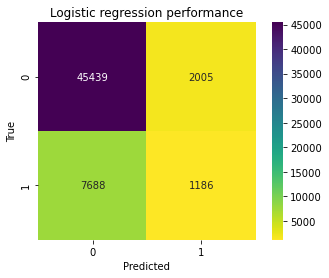

In [17]:
# Applying Logistic Regression without class weight/sampling
logistic= LogisticRegression()
temp=logistic.fit(X_train, Y_train)

Y_pred= logistic.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))


ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Logistic regression performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
#Precision: out of my predicted values how many are actually that predicted value. predict fewer false positives. opportunity cost miss
#Recall: out of all values, how many are actually that predicted value.predict fewer false negatives. minimize this 


In [19]:
# with open('logistic_wo.pkl', 'wb') as pickle_file:
#     pickle.dump(logistic, pickle_file)

In [4]:
with open('cleaned_data.pkl', 'rb') as pickle_file:
    loans = pickle.load(pickle_file)


NameError: name 'pickle' is not defined

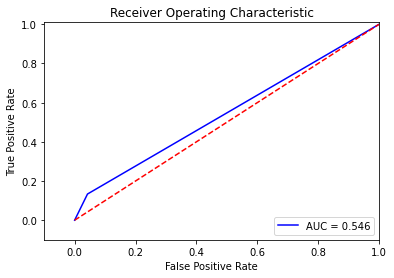

In [141]:
# ROC-AUC for logistic  classification
#tmp = logistic.fit(X_train, Y_train.ravel())
#Y_pred = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# Apply performance metrics function
logistic_int_rate, logistic_CoR, logistic_ROI = model_performance(Y_pred,'logistic model (no tuning)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.774bn
Total loans charged off = $0.127bn
Modelled cost of risk is: 16.41%
Total saving = $13.6m

Weighted average interest rate: 12.88%
Weighted average term: 44.37 months

Interest earned: $308.0m
Interest paid: $86.0m
Profit is: $95.0m
Return on investment is: 12.3%


<ipython-input-15-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [89]:
import xgboost as xgb

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): no suitable image found.  Did find:\n\t/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib: mach-o, but wrong architecture\n\t/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib: mach-o, but wrong architecture']


In [87]:
conda install -c anaconda py-xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     47444
           1       0.47      0.12      0.18      8874

    accuracy                           0.84     56318
   macro avg       0.66      0.55      0.55     56318
weighted avg       0.79      0.84      0.80     56318

Accuracy of the model is:  0.8399090876806705


Text(83.40000000000006, 0.5, 'True')

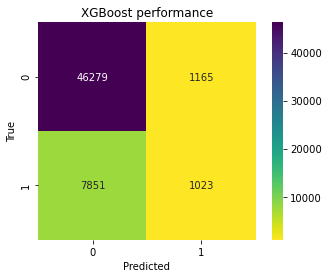

In [9]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


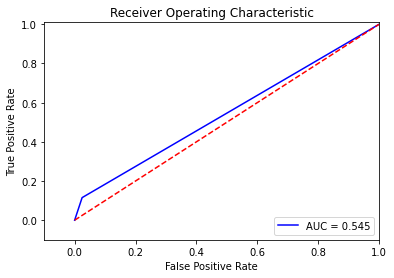

In [83]:
# ROC-AUC for XGBoost
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# Apply performance metrics function on XGBoost
xg_int_rate, xg_CoR, xg_ROI = model_performance(Y_pred,'XGBoost (no tuning)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.791bn
Total loans charged off = $0.129bn
Modelled cost of risk is: 16.3%
Total saving = $14.5m

Weighted average interest rate: 13.17%
Weighted average term: 44.74 months

Interest earned: $325.0m
Interest paid: $88.0m
Profit is: $108.0m
Return on investment is: 13.6%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


0:	learn: 0.6425809	total: 168ms	remaining: 2m 48s
1:	learn: 0.6033125	total: 259ms	remaining: 2m 9s
2:	learn: 0.5728493	total: 357ms	remaining: 1m 58s
3:	learn: 0.5494292	total: 464ms	remaining: 1m 55s
4:	learn: 0.5307706	total: 564ms	remaining: 1m 52s
5:	learn: 0.5158435	total: 647ms	remaining: 1m 47s
6:	learn: 0.5040087	total: 767ms	remaining: 1m 48s
7:	learn: 0.4945456	total: 856ms	remaining: 1m 46s
8:	learn: 0.4873349	total: 939ms	remaining: 1m 43s
9:	learn: 0.4810877	total: 1.05s	remaining: 1m 43s
10:	learn: 0.4760725	total: 1.16s	remaining: 1m 44s
11:	learn: 0.4723471	total: 1.28s	remaining: 1m 45s
12:	learn: 0.4692130	total: 1.4s	remaining: 1m 46s
13:	learn: 0.4665424	total: 1.5s	remaining: 1m 45s
14:	learn: 0.4644245	total: 1.62s	remaining: 1m 46s
15:	learn: 0.4626360	total: 1.71s	remaining: 1m 45s
16:	learn: 0.4610921	total: 1.8s	remaining: 1m 44s
17:	learn: 0.4599504	total: 1.88s	remaining: 1m 42s
18:	learn: 0.4589613	total: 1.97s	remaining: 1m 41s
19:	learn: 0.4580517	total

160:	learn: 0.4479170	total: 15.2s	remaining: 1m 19s
161:	learn: 0.4478945	total: 15.3s	remaining: 1m 19s
162:	learn: 0.4478790	total: 15.4s	remaining: 1m 18s
163:	learn: 0.4478617	total: 15.5s	remaining: 1m 18s
164:	learn: 0.4478382	total: 15.5s	remaining: 1m 18s
165:	learn: 0.4478139	total: 15.6s	remaining: 1m 18s
166:	learn: 0.4477976	total: 15.7s	remaining: 1m 18s
167:	learn: 0.4477756	total: 15.8s	remaining: 1m 18s
168:	learn: 0.4477492	total: 15.9s	remaining: 1m 18s
169:	learn: 0.4477276	total: 16s	remaining: 1m 17s
170:	learn: 0.4477047	total: 16.1s	remaining: 1m 17s
171:	learn: 0.4476871	total: 16.1s	remaining: 1m 17s
172:	learn: 0.4476654	total: 16.2s	remaining: 1m 17s
173:	learn: 0.4476506	total: 16.3s	remaining: 1m 17s
174:	learn: 0.4476333	total: 16.4s	remaining: 1m 17s
175:	learn: 0.4476067	total: 16.5s	remaining: 1m 17s
176:	learn: 0.4475819	total: 16.6s	remaining: 1m 17s
177:	learn: 0.4475638	total: 16.7s	remaining: 1m 16s
178:	learn: 0.4475423	total: 16.8s	remaining: 1m

319:	learn: 0.4453219	total: 29.3s	remaining: 1m 2s
320:	learn: 0.4453126	total: 29.4s	remaining: 1m 2s
321:	learn: 0.4452998	total: 29.5s	remaining: 1m 2s
322:	learn: 0.4452861	total: 29.6s	remaining: 1m 2s
323:	learn: 0.4452728	total: 29.7s	remaining: 1m 1s
324:	learn: 0.4452607	total: 29.8s	remaining: 1m 1s
325:	learn: 0.4452461	total: 29.9s	remaining: 1m 1s
326:	learn: 0.4452372	total: 29.9s	remaining: 1m 1s
327:	learn: 0.4452239	total: 30s	remaining: 1m 1s
328:	learn: 0.4452139	total: 30.1s	remaining: 1m 1s
329:	learn: 0.4452040	total: 30.2s	remaining: 1m 1s
330:	learn: 0.4451960	total: 30.3s	remaining: 1m 1s
331:	learn: 0.4451843	total: 30.4s	remaining: 1m 1s
332:	learn: 0.4451719	total: 30.5s	remaining: 1m 1s
333:	learn: 0.4451518	total: 30.6s	remaining: 1m
334:	learn: 0.4451406	total: 30.6s	remaining: 1m
335:	learn: 0.4451308	total: 30.7s	remaining: 1m
336:	learn: 0.4451172	total: 30.8s	remaining: 1m
337:	learn: 0.4450992	total: 30.9s	remaining: 1m
338:	learn: 0.4450900	total: 

481:	learn: 0.4436045	total: 43.9s	remaining: 47.2s
482:	learn: 0.4435923	total: 44s	remaining: 47.1s
483:	learn: 0.4435815	total: 44.1s	remaining: 47s
484:	learn: 0.4435722	total: 44.2s	remaining: 46.9s
485:	learn: 0.4435601	total: 44.2s	remaining: 46.8s
486:	learn: 0.4435517	total: 44.3s	remaining: 46.7s
487:	learn: 0.4435435	total: 44.4s	remaining: 46.6s
488:	learn: 0.4435362	total: 44.5s	remaining: 46.5s
489:	learn: 0.4435263	total: 44.6s	remaining: 46.4s
490:	learn: 0.4435138	total: 44.7s	remaining: 46.3s
491:	learn: 0.4435025	total: 44.8s	remaining: 46.2s
492:	learn: 0.4434935	total: 44.9s	remaining: 46.1s
493:	learn: 0.4434851	total: 45s	remaining: 46s
494:	learn: 0.4434750	total: 45s	remaining: 45.9s
495:	learn: 0.4434622	total: 45.1s	remaining: 45.8s
496:	learn: 0.4434496	total: 45.2s	remaining: 45.8s
497:	learn: 0.4434434	total: 45.3s	remaining: 45.7s
498:	learn: 0.4434347	total: 45.4s	remaining: 45.6s
499:	learn: 0.4434241	total: 45.5s	remaining: 45.5s
500:	learn: 0.4434144	

640:	learn: 0.4422211	total: 58.2s	remaining: 32.6s
641:	learn: 0.4422124	total: 58.3s	remaining: 32.5s
642:	learn: 0.4422053	total: 58.4s	remaining: 32.4s
643:	learn: 0.4421956	total: 58.5s	remaining: 32.3s
644:	learn: 0.4421853	total: 58.5s	remaining: 32.2s
645:	learn: 0.4421745	total: 58.6s	remaining: 32.1s
646:	learn: 0.4421638	total: 58.7s	remaining: 32s
647:	learn: 0.4421565	total: 58.8s	remaining: 32s
648:	learn: 0.4421522	total: 58.9s	remaining: 31.9s
649:	learn: 0.4421445	total: 59s	remaining: 31.8s
650:	learn: 0.4421375	total: 59.1s	remaining: 31.7s
651:	learn: 0.4421285	total: 59.2s	remaining: 31.6s
652:	learn: 0.4421217	total: 59.3s	remaining: 31.5s
653:	learn: 0.4421104	total: 59.4s	remaining: 31.4s
654:	learn: 0.4421009	total: 59.4s	remaining: 31.3s
655:	learn: 0.4420907	total: 59.5s	remaining: 31.2s
656:	learn: 0.4420808	total: 59.6s	remaining: 31.1s
657:	learn: 0.4420744	total: 59.7s	remaining: 31s
658:	learn: 0.4420665	total: 59.8s	remaining: 30.9s
659:	learn: 0.442059

799:	learn: 0.4409686	total: 1m 12s	remaining: 18.1s
800:	learn: 0.4409661	total: 1m 12s	remaining: 18s
801:	learn: 0.4409585	total: 1m 12s	remaining: 17.9s
802:	learn: 0.4409522	total: 1m 12s	remaining: 17.9s
803:	learn: 0.4409469	total: 1m 12s	remaining: 17.8s
804:	learn: 0.4409386	total: 1m 12s	remaining: 17.7s
805:	learn: 0.4409324	total: 1m 13s	remaining: 17.6s
806:	learn: 0.4409279	total: 1m 13s	remaining: 17.5s
807:	learn: 0.4409188	total: 1m 13s	remaining: 17.4s
808:	learn: 0.4409150	total: 1m 13s	remaining: 17.3s
809:	learn: 0.4409069	total: 1m 13s	remaining: 17.2s
810:	learn: 0.4408977	total: 1m 13s	remaining: 17.1s
811:	learn: 0.4408903	total: 1m 13s	remaining: 17s
812:	learn: 0.4408817	total: 1m 13s	remaining: 16.9s
813:	learn: 0.4408734	total: 1m 13s	remaining: 16.9s
814:	learn: 0.4408657	total: 1m 13s	remaining: 16.8s
815:	learn: 0.4408623	total: 1m 13s	remaining: 16.7s
816:	learn: 0.4408532	total: 1m 14s	remaining: 16.6s
817:	learn: 0.4408439	total: 1m 14s	remaining: 16.

954:	learn: 0.4398450	total: 1m 26s	remaining: 4.08s
955:	learn: 0.4398370	total: 1m 26s	remaining: 3.99s
956:	learn: 0.4398307	total: 1m 26s	remaining: 3.9s
957:	learn: 0.4398231	total: 1m 26s	remaining: 3.81s
958:	learn: 0.4398172	total: 1m 27s	remaining: 3.72s
959:	learn: 0.4398102	total: 1m 27s	remaining: 3.63s
960:	learn: 0.4398034	total: 1m 27s	remaining: 3.54s
961:	learn: 0.4397955	total: 1m 27s	remaining: 3.45s
962:	learn: 0.4397880	total: 1m 27s	remaining: 3.36s
963:	learn: 0.4397806	total: 1m 27s	remaining: 3.27s
964:	learn: 0.4397741	total: 1m 27s	remaining: 3.18s
965:	learn: 0.4397654	total: 1m 27s	remaining: 3.08s
966:	learn: 0.4397586	total: 1m 27s	remaining: 3s
967:	learn: 0.4397529	total: 1m 27s	remaining: 2.9s
968:	learn: 0.4397446	total: 1m 27s	remaining: 2.81s
969:	learn: 0.4397408	total: 1m 28s	remaining: 2.72s
970:	learn: 0.4397298	total: 1m 28s	remaining: 2.63s
971:	learn: 0.4397201	total: 1m 28s	remaining: 2.54s
972:	learn: 0.4397142	total: 1m 28s	remaining: 2.45

Text(83.40000000000006, 0.5, 'True')

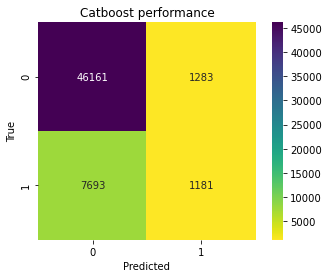

In [54]:
#Apply Catboost algorithm
from catboost import CatBoostClassifier


clf = CatBoostClassifier(
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Catboost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


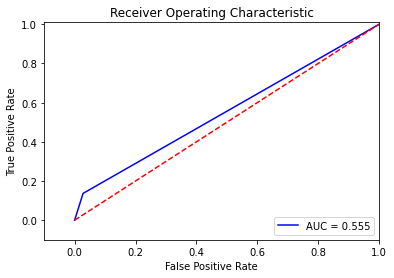

In [86]:
# ROC-AUC for XGBoost
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
# Apply performance metrics function on CatBoost
clf_int_rate, clf_CoR, clf_ROI = model_performance(Y_pred,'CatBoost', total_CoR_test, loans_test, CoF)




Total loans approved = $0.783bn
Total loans charged off = $0.124bn
Modelled cost of risk is: 15.89%
Total saving = $18.0m

Weighted average interest rate: 13.18%
Weighted average term: 44.72 months

Interest earned: $323.0m
Interest paid: $88.0m
Profit is: $111.0m
Return on investment is: 14.23%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     47444
           1       0.45      0.10      0.17      8874

    accuracy                           0.84     56318
   macro avg       0.65      0.54      0.54     56318
weighted avg       0.79      0.84      0.79     56318

Accuracy of the model is:  0.8391988351859085


Text(83.40000000000006, 0.5, 'True')

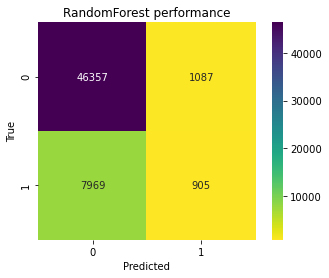

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini')
rf.fit(X_train, Y_train)
Y_Pred= rf.predict(X_test)
# rf_probs = rf.predict_proba(Y_test)[:, 1]


print(classification_report(Y_test, Y_Pred))
#print(confusion_matrix(Y_test, rf_predictions))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_Pred,Y_test))
# print("Precision score: ", precision_score(Y_test,Y_Pred))
# print("Recall score: {}", recall_score(Y_test,Y_Pred))

# roc_auc_score(Y_test, rf_probs)

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


In [12]:
with open('randomforest.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [1]:
print('helllo')

helllo


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     47444
           1       0.45      0.10      0.16      8874

    accuracy                           0.84     56318
   macro avg       0.65      0.54      0.54     56318
weighted avg       0.79      0.84      0.79     56318

Accuracy of the model is:  0.8387904400014206
Recall score: 0.10074374577417174


Text(83.40000000000006, 0.5, 'True')

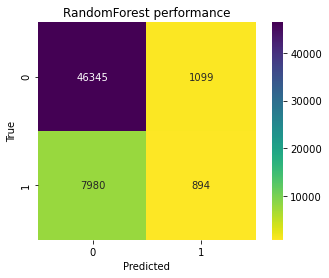

In [63]:
# Random Forest
Y_Pred= rf.predict(X_test)
print(classification_report(Y_test, Y_Pred))
#print(confusion_matrix(Y_test, rf_predictions))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_Pred,Y_test))
#print("Precision score: {}".format(precision_score(Y_test,Y_Pred)))
print("Recall score: {}".format(recall_score(Y_test,Y_Pred)))

# roc_auc_score(Y_test, rf_probs)

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


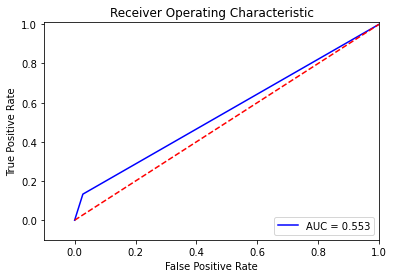

In [64]:
# ROC-AUC for Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
# Apply performance metrics function on RandomForest
rf_int_rate, rf_CoR, rf_ROI = model_performance(Y_pred,'R Forest', total_CoR_test, loans_test, CoF)




Total loans approved = $0.785bn
Total loans charged off = $0.126bn
Modelled cost of risk is: 15.99%
Total saving = $17.1m

Weighted average interest rate: 13.19%
Weighted average term: 44.76 months

Interest earned: $325.0m
Interest paid: $88.0m
Profit is: $111.0m
Return on investment is: 14.15%


<ipython-input-45-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


              precision    recall  f1-score   support

           0       0.90      0.55      0.68     47444
           1       0.22      0.68      0.33      8874

    accuracy                           0.57     56318
   macro avg       0.56      0.61      0.51     56318
weighted avg       0.79      0.57      0.63     56318

Accuracy of the model is:  0.569604744486665


Text(83.40000000000006, 0.5, 'True')

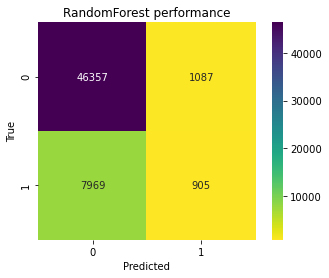

In [13]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, Y_train)

Y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_Pred)

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('RandomForest performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


In [14]:
with open('Naivebayes.pkl', 'wb') as f:
    pickle.dump(naive, f)

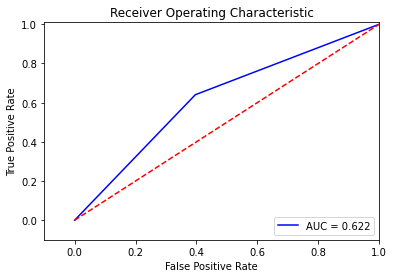

In [67]:
# ROC-AUC for Naive Bayes

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [143]:
# Apply performance metrics function on Naive Bayes
naive_int_rate, naive_CoR, naive_ROI = model_performance(Y_pred,'Naive Bayes', total_CoR_test, loans_test, CoF)

Total loans approved = $0.774bn
Total loans charged off = $0.127bn
Modelled cost of risk is: 16.41%
Total saving = $13.6m

Weighted average interest rate: 12.88%
Weighted average term: 44.37 months

Interest earned: $308.0m
Interest paid: $86.0m
Profit is: $95.0m
Return on investment is: 12.3%


<ipython-input-138-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [99]:
from sklearn.metrics import precision_recall_curve
def threshold_calculation(model, threshold_list):
#     pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        Y_test_pred = (model.predict_proba(X_test)[:,1]>i).astype("int32")
        test_accuracy = accuracy_score(Y_test, Y_test_pred)
        print('Our testing accuracy is {}'.format(test_accuracy))
        print(confusion_matrix(Y_test, Y_test_pred))
        
      
    #plot precision/recall curve against different thresholds
    
    pred_y = model.predict(X_test) 
    probs_y = model.predict_proba(X_test) # probs_y is probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
    precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1])
    
    #retrieve probability of being 1(in second column of probs_y)
    pr_auc = auc(recall, precision)
    
    plt.subplot(1, 2, 1)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    
    
    plt.subplot(1, 2, 2)
    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.title("Precision-Recall")
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    

### Imbalanced Data - Tuning with Class Weight and Undersampling 

In [69]:
# Exploring best class weight for logistic regression
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import collections, numpy

lr = LogisticRegression()
# n = collections.Counter(Y_train)
# class_weights = {0:1 - n[0]/(n[0]+n[1]), 1:1 - n[1]/(n[0]+n[1])}
# penalty = ['l1', 'l2']
# C = np.logspace(0, 4, 10)
# param_grid = dict(C=C, penalty=penalty)



#Setting the range for class weights
weights = np.linspace(0.0,0.5)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}


#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, Y_train)


# logistic_cw = LogisticRegression(class_weight = class_weights, max_iter=1000)
# logistic_cw_grid = GridSearchCV(logistic_cw, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
# logistic_cw_grid.fit(X_train, Y_train)


#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.6min


KeyboardInterrupt: 

In [59]:
print('Best Params for logistic with class weights: ', gridsearch.best_params_)

Best Params for logistic with class weights:  {'class_weight': {0: 0.2040816326530612, 1: 0.7959183673469388}}


In [32]:
# Exploring class-weight - Applying Logistic Regression with class_weight

n = Y_train.value_counts()
#class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)
from sklearn.metrics import precision_score
logistic_cw = LogisticRegression(class_weight = {0: 0.2040816326530612, 1: 0.7959183673469388})
logistic_cw.fit(X_train, Y_train)

Y_pred_cw = logistic_cw.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_cw))
print(confusion_matrix(Y_test, Y_pred_cw))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_cw,Y_test))
print("Precision score: {}".format(precision_score(Y_test,Y_pred_cw)))
print("Recall score: {}".format(recall_score(Y_test,Y_pred_cw)))
conf_matrix = confusion_matrix(Y_test, Y_pred_cw)
roc_auc_score(Y_test, logistic_cw.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.92      0.53      0.67     47444
           1       0.23      0.76      0.36      8874

    accuracy                           0.57     56318
   macro avg       0.58      0.64      0.51     56318
weighted avg       0.81      0.57      0.62     56318

[[25092 22352]
 [ 2123  6751]]
Accuracy of the model is:  0.5654142547675699
Precision score: 0.2319692127959317
Recall score: 0.7607617759747577


0.6993355387114324

In [15]:
with open('logistic_weight.pkl', 'rb') as pickle_file:
    logistic_cw = pickle.load(pickle_file)

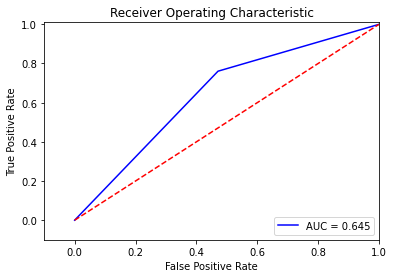

In [145]:
# ROC-AUC for Logistic regression + Class Weight

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_cw)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
with open('cleaned_data.pkl', 'rb') as pickle_file:
    loans = pickle.load(pickle_file)

In [33]:
# Performance metrics for Logistic regression + Class Weight
logistic_cw_int_rate, logistic_cw_CoR, logistic_cw_RoE = model_performance(Y_pred_cw,'logistic model (class weights)', total_CoR_test, loans_test, CoF)

Total loans approved = $0.36bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.85%
Total saving = $76.9m

Weighted average interest rate: 9.25%
Weighted average term: 39.68 months

Interest earned: $100.0m
Interest paid: $36.0m
Profit is: $33.0m
Return on investment is: 9.1%


<ipython-input-28-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [ ]:
##Undersampling Behavior

In [73]:
# Explore undersampling in Logistic Regression
from imblearn.under_sampling import RandomUnderSampler 

# print("Before UnderSampling, counts of label '1': {}".format(sum(Y_train==1)))
# print("Before UnderSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

# ratio ={1: 221317, 0:400000} #ratio 0.55
rus = RandomUnderSampler(random_state =42)
X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train.ravel())
print("After UnderSampling, counts of label '1': {}".format(sum(Y_train_rus==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(Y_train_rus==0)))

ModuleNotFoundError: No module named 'imblearn'

In [114]:
# Exploring class-weight - Applying Logistic Regression with class_weight + Undersampling

n = Y_train.value_counts()
#class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)
from sklearn.metrics import precision_score
logistic_us = LogisticRegression()
logistic_us.fit(X_train_rus, Y_train_rus)

Y_pred_us = logistic_us.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_us))
print(confusion_matrix(Y_test, Y_pred_us))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))
print("Precision score: {}".format(precision_score(Y_test,Y_pred_us)))
print("Recall score: {}".format(recall_score(Y_test,Y_pred_us)))
conf_matrix = confusion_matrix(Y_test, Y_pred_us)
roc_auc_score(Y_test, logistic_cw.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.92      0.52      0.67     47444
           1       0.23      0.77      0.35      8874

    accuracy                           0.56     56318
   macro avg       0.58      0.64      0.51     56318
weighted avg       0.81      0.56      0.62     56318

[[24703 22741]
 [ 2062  6812]]
Accuracy of the model is:  0.5595901843105224
Precision score: 0.2305011335566609
Recall score: 0.7676357899481632


0.6983089532863169

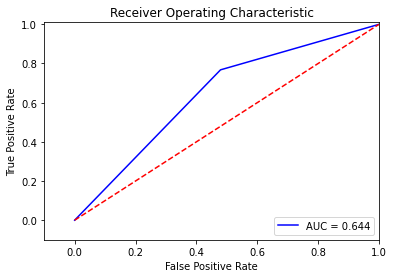

In [115]:
# ROC-AUC for Logistic regression + Undersampling

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_us)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
# Performance metrics for Logistic regression + Undersampling
logistic_us_int_rate, logistic_us_CoR, logistic_us_RoE = model_performance(Y_pred_us,'logistic model (class weights)', total_CoR_test, loans_test, CoF)

Total loans approved = $0.353bn
Total loans charged off = $0.031bn
Modelled cost of risk is: 8.73%
Total saving = $77.9m

Weighted average interest rate: 9.19%
Weighted average term: 39.6 months

Interest earned: $98.0m
Interest paid: $35.0m
Profit is: $32.0m
Return on investment is: 9.05%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [74]:
# Cross Validation to get best class weight for XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# define model
xg = xgb.XGBClassifier()
# define grid
weights = [10, 25, 50, 75, 99, 100]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
#cv = KFold(n_splits=10, n_repeats=3, random_state=1)
#cv=KFold(10,shuffle=True,random_state=42).get_n_splits(X_train.values)
# define grid search
grid = GridSearchCV(estimator=xg, param_grid=param_grid, n_jobs=-1,scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, Y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/thomaskim/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


[07:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.26      0.41     47444
           1       0.19      0.94      0.32      8874

    accuracy                           0.37     56318
   macro avg       0.58      0.60      0.36     56318
weighted avg       0.84      0.37      0.39     56318

Accuracy of the model is:  0.36514080755708656


Text(83.40000000000006, 0.5, 'True')

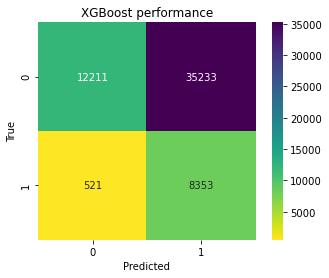

In [102]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators,scale_pos_weight=10)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train,Y_train)
Y_pred = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

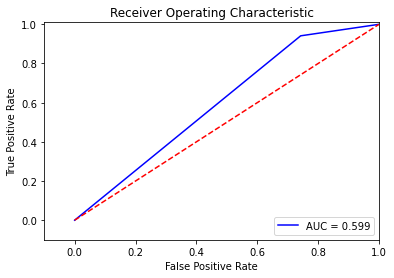

In [103]:
# ROC-AUC for XGBoost - Tuned

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
xg_cw_int_rate, xg_cw_CoR, xg_cw_RoE = model_performance(Y_pred_cw,'XGBoost (class weights)', total_CoR_test, loans_test, CoF)




<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


Total loans approved = $0.36bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.84%
Total saving = $77.0m

Weighted average interest rate: 9.25%
Weighted average term: 39.67 months

Interest earned: $100.0m
Interest paid: $36.0m
Profit is: $33.0m
Return on investment is: 9.12%


C:\Users\Chait\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     47444
           1       0.25      0.75      0.37      8874

    accuracy                           0.61     56318
   macro avg       0.59      0.66      0.54     56318
weighted avg       0.82      0.61      0.66     56318

Accuracy of the model is:  0.6076565218935331


Text(83.40000000000006, 0.5, 'True')

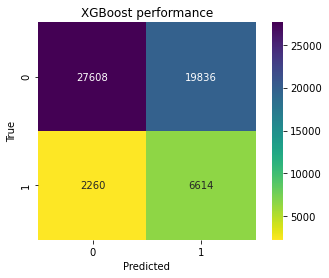

In [117]:
# Apply XGBoosting model on train data + Undersampling
import xgboost as xgb
xg = xgb.XGBClassifier()

n_estimators = 100
xg.set_params(max_depth=4, n_estimators=n_estimators)
train_r2 = []

steps = range(100,1000,10)

xg.fit(X_train_rus,Y_train_rus)
Y_pred_us = xg.predict(X_test)

# Summary of the prediction
print(classification_report(Y_test, Y_pred_us))
#print(confusion_matrix(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred_us)
# Accuracy
print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('XGBoost performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

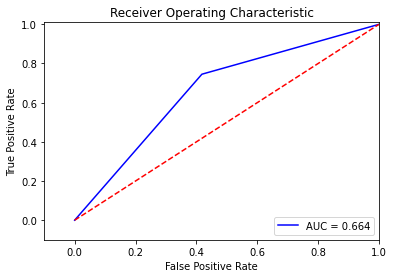

In [119]:
# ROC-AUC for XGBoost - undersampled

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_us)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
xg_us_int_rate, xg_us_CoR, xg_us_RoE = model_performance(Y_pred_us,'XGBoost (class weights)', total_CoR_test, loans_test, CoF)




Total loans approved = $0.388bn
Total loans charged off = $0.032bn
Modelled cost of risk is: 8.34%
Total saving = $81.2m

Weighted average interest rate: 9.54%
Weighted average term: 40.88 months

Interest earned: $116.0m
Interest paid: $40.0m
Profit is: $44.0m
Return on investment is: 11.25%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


### Neural Net

In [ ]:
# Apply Neural Network algorithm

import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.layers import Dense, Activation,Dropout
#from tensorflow.python.keras.optimizers import SGD

input_nodes = X_train.shape[1]
#output_nodes = 1

model = Sequential()

#model.add(Input((input_nodes,)))
model.add(Dense(units=16,activation="sigmoid"))
model.add(Dense(units=32, activation="sigmoid"))
model.add(Dense(units=2, activation="softmax"))
#model.add(Dense(output_nodes))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
model.fit(X_train, Y_train, batch_size=20, validation_split=0.1, epochs=50,verbose=2)

Accuracy: 83.90
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     47444
           1       0.46      0.11      0.18      8874

    accuracy                           0.84     56318
   macro avg       0.66      0.54      0.55     56318
weighted avg       0.79      0.84      0.80     56318

Confusion Matrix:


Text(83.40000000000006, 0.5, 'True')

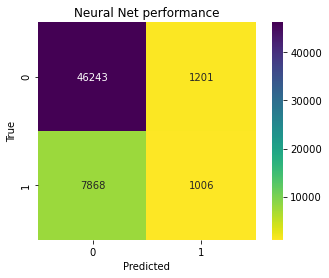

In [124]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, np.argmax(Y_pred, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('Classification Report:')
print(classification_report(Y_test, np.argmax(Y_pred, axis=1)))
print('Confusion Matrix:')
#print(confusion_matrix(Y_test, np.argmax(Y_pred, axis=1)))

conf_matrix = confusion_matrix(Y_test, np.argmax(Y_pred, axis=1))
# Accuracy
#print("Accuracy of the model is: ", accuracy_score(Y_pred_us,Y_test))

ax = sns.heatmap(conf_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_title('Neural Net performance')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')


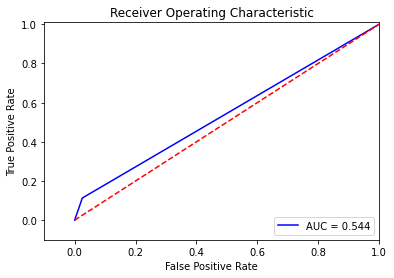

In [128]:
# ROC-AUC for XGBoost - undersampled

fpr, tpr, thresholds = roc_curve(Y_test, np.argmax(Y_pred, axis=1))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
nn_int_rate, nn_us_CoR, nn_us_RoE = model_performance(np.argmax(Y_pred, axis=1),'Neural Net', total_CoR_test, loans_test, CoF)




Total loans approved = $0.788bn
Total loans charged off = $0.128bn
Modelled cost of risk is: 16.28%
Total saving = $14.7m

Weighted average interest rate: 13.22%
Weighted average term: 44.77 months

Interest earned: $325.0m
Interest paid: $88.0m
Profit is: $109.0m
Return on investment is: 13.81%


<ipython-input-75-69ac5cf41522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


In [ ]:
probability_threshold_sens = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pts_x_axis = [str(int(i*100))+"%" for i in probability_threshold_sens]

In [56]:
with open('logistic_weight.pkl', 'rb') as pickle_file:
    lw = pickle.load(pickle_file)

In [57]:
def probability_threshold_sensitivity(probability_threshold_sens, model, X_test, y_test, df, column):
    """
    Function to sensitise the probability threshold
    - probability_threshold_sens (list of floats): the values to flex the probability threshold
    - model: the predictive model to use
    - X_test (df): our test set
    - y_test (df): dependent variable linked ot the test set
    - df (dataframe): test dataframe 
    - column (string): name of the new column to be connected to the 
    - Returns: the predictions (df), interest rate (list), CoR (list), RoE (list), banking profit (list)
    """
    CoF =3
    
    # Setting up the blank outputs:
    int_rate_sens = []
    CoR_sens = []
    RoE_sens = []
    banking_profit_sens = []
    
    # Let's cycle through the probability thresholds
    for i in probability_threshold_sens:
        
        # Calculating the ANN and catboost outcomes as per revised thresholds:
#         if model == ann_model:
#             y_pred = (model.predict(X_test) > i).astype("int32")
#         else:
        y_pred = (model.predict_proba(X_test)[:,1] > i).astype("int32")
        
        # Calculate the confusion matrices
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Creating a new column:
        df[column] = y_pred

        # Create a dataframe with just the approved loans:
        y_test_approved = df.loc[df[column].isin([0])]

        # What was the performance of the approved loans? Creating a small array with that info
        approved_performance = y_test_approved.groupby('charge_off_rate').loan_amnt.sum()

        # CoR is the proportion that was charged off:
        loans_approved = approved_performance.sum()
        loans_charged_off = approved_performance[1]
        CoR = loans_charged_off / loans_approved

        # Calculate the interest rate for the modelled portfolio
        wgt_av_int_rate = y_test_approved['int_rate_amnt'].sum() / y_test_approved['loan_amnt'].sum()

        # What is the average term of the new portfolio?
        wgt_av_term = y_test_approved['term_amnt'].sum() / y_test_approved['loan_amnt'].sum()

        # And finally, the RoE:
        loans_returned = loans_approved - loans_charged_off
        interest_earned = loans_returned * wgt_av_int_rate / 100 * (wgt_av_term / 12)
        interest_paid = loans_approved * CoF / 100 * (wgt_av_term / 12)
        banking_profit = interest_earned - interest_paid - loans_charged_off
        RoE = banking_profit / loans_approved
        
        # Appending the sensitivities:
        int_rate_sens.append(wgt_av_int_rate)
        CoR_sens.append(CoR)
        RoE_sens.append(RoE)
        banking_profit_sens.append(banking_profit)
        
        banking_profit_m_sens = [i/1e6 for i in banking_profit_sens]
    
    return y_pred, int_rate_sens, CoR_sens, RoE_sens, banking_profit_m_sens

In [ ]:
y_pred_cb, int_rate_sens_cb, CoR_sens_cb, RoE_sens_cb, profit_cb = probability_threshold_sensitivity(probability_threshold_sens, lw, X_test_cb, y_test, loans_test, 'catboost_pred')

### Simulation

In [42]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [43]:
#gives back necessary financial metrics of loan data for comparison
def ROI_total(df):
    """
    Function to return all of the financial returns data for comparing the models
    returns: the total book return on equity in %
    """
        
    weighted_term = df['term_amnt'].sum() / df['loan_amnt'].sum()
    weighted_interest = df['int_amnt'].sum() / df['loan_amnt'].sum()
    charge_off_rate = df['loan_class'].value_counts(normalize=True)
    charge_off_amount = df.groupby('loan_class').loan_amnt.sum() #dollar amount of each loan_class
    total_CoR = charge_off_amount[1] / df['loan_amnt'].sum() #dollar amount of default loans

    loans_approved = df.loan_amnt.sum() #total dollar amount of loans 
    loans_charged_off = charge_off_amount[1] #total dollar amount of default loans

    # And therefore, the RoE:
    loans_returned = loans_approved - loans_charged_off #total loan amount paid back
    interest_earned = loans_returned * (weighted_interest) / 100 * (weighted_term / 12) #interest amount per year 
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12) #CoF (cost of funds)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = profit / loans_approved


    return ROI

In [44]:
n = [20,30,10, 10,5, 5, 10]

In [45]:
total_CoR_test

0.180318053739518

In [35]:
n[0]

20

In [46]:
from sklearn.utils import shuffle
def ROI_model(y_pred, column, n):
    """
    Compares model prediction metrics against the metrics of the test set loans as well as CoR
    y_pred - the model prediction of loan class
    Returns interest rate, cost of risk and ROI of the book in % 
    """
    df = loans_test
    COF = 3
    a, b, c, d, e, f, g = n[0],n[1],n[2],n[3],n[4],n[5],n[6]
    # Adding new column with the predicted charge off rate
    df[column] = y_pred
    y_test_paid = df.loc[df[column].isin([0])]
    a_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 1) & (y_test_paid['sub_grade'] <= 5)])[0:a]
    b_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 6) & (y_test_paid['sub_grade'] <= 10)])[0:b]
    c_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 11) & (y_test_paid['sub_grade'] <= 15)])[0:c]
    d_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 16) & (y_test_paid['sub_grade'] <= 20)])[0:d]
    e_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 21) & (y_test_paid['sub_grade'] <= 25)])[0:e]
    f_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 26) & (y_test_paid['sub_grade'] <= 30)])[0:f]
    g_loans = shuffle(y_test_paid.loc[(y_test_paid['sub_grade'] >= 31) & (y_test_paid['sub_grade'] <= 35)])[0:g]
    
    y_test_paid = pd.concat([a_loans, b_loans, c_loans, d_loans, e_loans, f_loans, g_loans])
    
    
    performance = y_test_paid.groupby('loan_class').loan_amnt.sum()
    

    # CoR is the proportion that was charged off:
    loans_approved = performance.sum()
    loans_charged_off = performance[1]
    CoR = loans_charged_off / loans_approved

    saving = df['loan_amnt'].sum() * (total_CoR_test - CoR)

    weighted_interest = y_test_paid['int_amnt'].sum() / y_test_paid['loan_amnt'].sum()
    weighted_term = y_test_paid['term_amnt'].sum() / y_test_paid['loan_amnt'].sum()

    # ROI
    loans_returned = loans_approved - loans_charged_off
    interest_earned = loans_returned * weighted_interest / 100 * (weighted_term / 12)
    interest_paid = loans_approved * CoF / 100 * (weighted_term / 12)
    profit = interest_earned - interest_paid - loans_charged_off
    ROI = (profit / loans_approved)
    


    return ROI

In [47]:
def modeling(X_train, Y_train):

#     n = Y_train.value_counts()
#     class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}
# class_weights
# Applying Logistic Regression on class weights (final ratio)

    logistic_cw = LogisticRegression(C= 1291.54, class_weight = {0: 0.2040816326530612, 1: 0.7959183673469388}, max_iter=1000)
    logistic_cw.fit(X_train, Y_train)

    y_pred = logistic_cw.predict(X_test)
    
    return y_pred



In [34]:
y_pred = logistic_cw.predict(X_test)

In [36]:
with open('y_pred.pkl', 'wb') as pickle_file:
    pickle.dump(y_pred, pickle_file)

In [48]:
ROI_model(y_pred,'logistic model (class weights)', n)

<ipython-input-46-68b200d9fb22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred


0.20383848396124604

In [199]:
a = shuffle(a_loans)[0:10]
b = shuffle(b_loans)[0:10]
c = shuffle(c_loans)[0:5]
d = shuffle(d_loans)[0:10]
e = shuffle(e_loans)[0:5]
f = shuffle(f_loans)[0:15]
g = shuffle(g_loans)[0:30]

In [39]:
ROI_total(loans)

0.0679261276636615

In [49]:


model_ROI = []
lc_ROI = []

for i in range(10):
    loan_shuffled = shuffle(loans)
    l_ROI = ROI_total(loan_shuffled[0:100])
    lc_ROI.append(l_ROI)
    
    y_pred = modeling(X_train, Y_train)
    m_ROI = ROI_model(y_pred,'logistic model (class weights)', n)
    model_ROI.append(m_ROI)

    
    

<ipython-input-46-68b200d9fb22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred
<ipython-input-46-68b200d9fb22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = y_pred
<ipython-input-46-68b200d9fb22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
ROI_df = pd.DataFrame()
ROI_df['model_ROI'] = model_ROI
ROI_df['lc_ROI'] = lc_ROI

In [51]:
lc_ROI

[0.02317695263018032,
 0.07406897690276319,
 0.007312848027393639,
 0.09328072926053843,
 0.141112354726925,
 0.16501456076228402,
 0.056857940526937475,
 0.019210511357281915,
 0.05905400342012256,
 0.0609808084352148]

In [40]:

# Plot histogram of IRR
ROI_df = pd.DataFrame()
ROI_df['model_ROI'] = model_ROI
ROI_df['lc_ROI'] = lc_ROI

fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(tuple(ROI_df['model_ROI']))
ax = sns.distplot(tuple(ROI_df['lc_ROI']))


ax.set_xlabel("Rate of Return",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend(labels=["Model ROI", 'Benchmark (Lending Club) ROI'], fontsize=16)
plt.savefig(fname='ROI_Hist', dpi=150)
plt.show()

NameError: name 'model_ROI' is not defined